In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## EDA

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
df.shape

(7043, 21)

In [70]:
for col in df.iloc[:, :10].columns:
    if col == 'customerID' or col == 'tenure':
        print(f"{col} --> {df[col].head().unique().tolist()}\n")
    else:
        print(f"{col} --> {df[col].unique().tolist()}\n")

customerID --> ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU']

gender --> ['Female', 'Male']

SeniorCitizen --> [0, 1]

Partner --> ['Yes', 'No']

Dependents --> ['No', 'Yes']

tenure --> [1, 34, 2, 45]

PhoneService --> ['No', 'Yes']

MultipleLines --> ['No phone service', 'No', 'Yes']

InternetService --> ['DSL', 'Fiber optic', 'No']

OnlineSecurity --> ['No', 'Yes', 'No internet service']



In [71]:
for col in df.iloc[:, 10:].columns:
    if col == 'MonthlyCharges' or col == 'TotalCharges':
        print(f"{col} --> {df[col].head().unique().tolist()}\n")
    else:
        print(f"{col} --> {df[col].unique().tolist()}\n")

OnlineBackup --> ['Yes', 'No', 'No internet service']

DeviceProtection --> ['No', 'Yes', 'No internet service']

TechSupport --> ['No', 'Yes', 'No internet service']

StreamingTV --> ['No', 'Yes', 'No internet service']

StreamingMovies --> ['No', 'Yes', 'No internet service']

Contract --> ['Month-to-month', 'One year', 'Two year']

PaperlessBilling --> ['Yes', 'No']

PaymentMethod --> ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

MonthlyCharges --> [29.85, 56.95, 53.85, 42.3, 70.7]

TotalCharges --> ['29.85', '1889.5', '108.15', '1840.75', '151.65']

Churn --> ['No', 'Yes']



## Feature Engineering

Convert 'TotalCharges' data type to float

In [72]:
df[df['TotalCharges'] == ' '].reset_index(drop=True)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4472-LVYGI  Female              0     Yes        Yes       0           No   
1   3115-CZMZD    Male              0      No        Yes       0          Yes   
2   5709-LVOEQ  Female              0     Yes        Yes       0          Yes   
3   4367-NUYAO    Male              0     Yes        Yes       0          Yes   
4   1371-DWPAZ  Female              0     Yes        Yes       0           No   
5   7644-OMVMY    Male              0     Yes        Yes       0          Yes   
6   3213-VVOLG    Male              0     Yes        Yes       0          Yes   
7   2520-SGTTA  Female              0     Yes        Yes       0          Yes   
8   2923-ARZLG    Male              0     Yes        Yes       0          Yes   
9   4075-WKNIU  Female              0     Yes        Yes       0          Yes   
10  2775-SEFEE    Male              0      No        Yes       0          Yes   

       MultipleLines InternetService       OnlineSecurity  \
0   No phone service             DSL                  Yes   
1                 No              No  No internet service   
2                 No             DSL                  Yes   
3                Yes              No  No internet service   
4   No phone service             DSL                  Yes   
5                 No              No  No internet service   
6                Yes              No  No internet service   
7                 No              No  No internet service   
8                 No              No  No internet service   
9                Yes             DSL                   No   
10               Yes             DSL                  Yes   

           OnlineBackup     DeviceProtection          TechSupport  \
0                    No                  Yes                  Yes   
1   No internet service  No internet service  No internet service   
2                   Yes                  Yes                   No   
3   No internet service  No internet service  No internet service   
4                   Yes                  Yes                  Yes   
5   No internet service  No internet service  No internet service   
6   No internet service  No internet service  No internet service   
7   No internet service  No internet service  No internet service   
8   No internet service  No internet service  No internet service   
9                   Yes                  Yes                  Yes   
10                  Yes                   No                  Yes   

            StreamingTV      StreamingMovies  Contract PaperlessBilling  \
0                   Yes                   No  Two year              Yes   
1   No internet service  No internet service  Two year               No   
2                   Yes                  Yes  Two year               No   
3   No internet service  No internet service  Two year               No   
4                   Yes                   No  Two year               No   
5   No internet service  No internet service  Two year               No   
6   No internet service  No internet service  Two year               No   
7   No internet service  No internet service  Two year               No   
8   No internet service  No internet service  One year              Yes   
9                   Yes                   No  Two year               No   
10                   No                   No  Two year              Yes   

                PaymentMethod  MonthlyCharges TotalCharges Churn  
0   Bank transfer (automatic)           52.55                 No  
1                Mailed check           20.25                 No  
2                Mailed check           80.85                 No  
3                Mailed check           25.75                 No  
4     Credit card (automatic)           56.05                 No  
5                Mailed check           19.85                 No  
6                Mailed check           25.35                 No  
7                Mailed check   

In [73]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

In [74]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [75]:
df[df['tenure'] == 36].head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
116  9560-BBZXK  Female              0      No         No      36   
338  7982-VCELR  Female              0      No         No      36   
436  4980-URKXC    Male              0     Yes         No      36   
444  1910-FMXJM  Female              0     Yes         No      36   
838  6092-QZVPP    Male              0      No         No      36   

    PhoneService     MultipleLines InternetService       OnlineSecurity  \
116           No  No phone service             DSL                  Yes   
338          Yes                No     Fiber optic                   No   
436          Yes                No              No  No internet service   
444          Yes                No     Fiber optic                   No   
838          Yes                No             DSL                  Yes   

            OnlineBackup     DeviceProtection          TechSupport  \
116                   No                   No                   No   
338                  Yes                   No                   No   
436  No internet service  No internet service  No internet service   
444                   No                   No                   No   
838                   No                  Yes                  Yes   

             StreamingTV      StreamingMovies        Contract  \
116                   No                   No        Two year   
338                  Yes                  Yes  Month-to-month   
436  No internet service  No internet service        One year   
444                   No                  Yes  Month-to-month   
838                  Yes                  Yes  Month-to-month   

    PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
116               No  Bank transfer (automatic)           31.05       1126.35   
338              Yes    Credit card (automatic)           94.80       3565.65   
436               No  Bank transfer (automatic)           20.85        720.05   
444               No           Electronic check           80.40       2937.65   
838              Yes    Credit card (automatic)           79.20       2854.95   

    Churn  
116    No  
338    No  
436    No  
444    No  
838    No

Categorize 'tenure' per year

In [76]:
# # Categorize 'tenure'
# tenure_bins = [-1, 12, 24, 36, 48, 60, 72]
# tenure_labels = ['1st Year', '2nd Year', '3rd Year', '4th Year', '5th Year', '6th Year']
# df['tenure'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=True)

# df['tenure'] = df['tenure'].astype('object')

In [77]:
# df['tenure'].unique()

### Data Distribution

In [78]:
def dist_col_plot(rows, cols, data):
    fig, axes = plt.subplots(rows, cols, figsize=(30, 10))

    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(data.columns):
            sns.histplot(data=data, x=data.columns[i], ax=ax)
            ax.set_title(data.columns[i])
        else:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

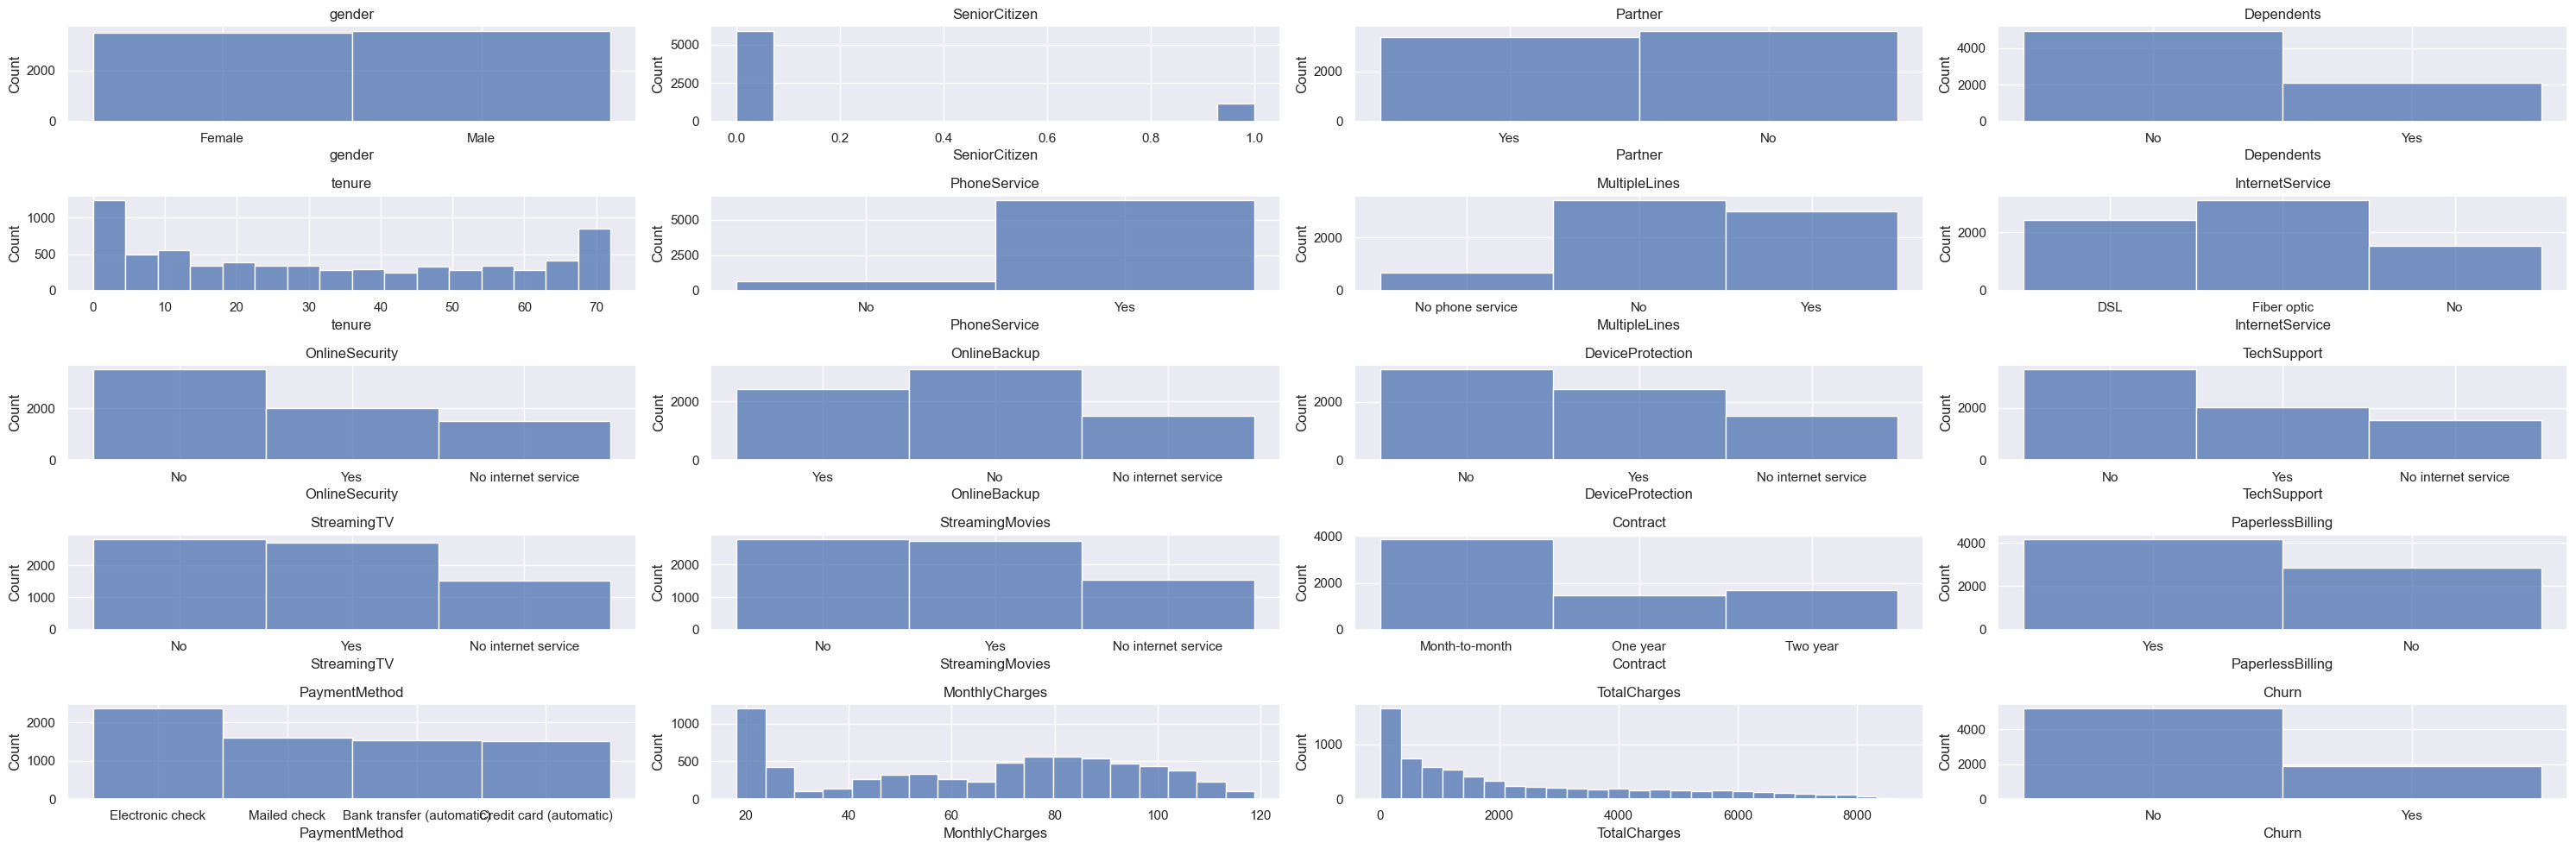

In [79]:
dist_col_plot(rows=5, cols=4, data=df.iloc[:, 1:])

### Checking Outliers

In [80]:
def plot_box(data, labels, title, figsize=(10, 5)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value', fontsize=14)  # Menambahkan fontsize di sini
    ax.set_title(title, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)
    ax.tick_params(axis='x', labelsize=14)  # Memperbesar ukuran font pada sumbu x
    plt.show()

In [81]:
df.select_dtypes(exclude='object')

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7043 rows x 4 columns]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


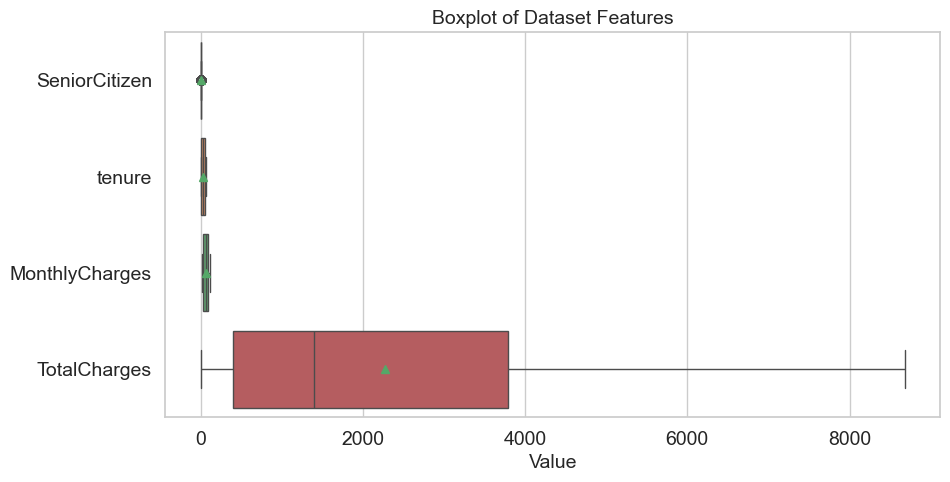

In [83]:
data=df.select_dtypes(exclude='object')

plot_box(data = data,
         labels = data.columns.tolist(),
         title='Boxplot of Dataset Features')

### Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def print_mapping_classes(col):
    print(f"Column '{col}':")
    df[col] = le.fit_transform(df[col])
    
    for i in range(len(df[col].unique())):
        print(f"   --> {le.classes_[i]} : {i}")

In [85]:
df.iloc[:, 1:].select_dtypes(include='object')

gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod Churn  
0              Electronic check    No  
1                  Mailed check    No  
2                  Mailed check   Yes  
3     Bank transfer (automatic)    No  
4              Electronic check   Yes  
...                         ...   ...  
7038               Mailed check    No  
7039    Credit card (automatic)    No  
7040           Electronic check    No  
7041               Mailed check   Yes  
7042  Bank transfer (automatic)    No  

[7043 rows x 16 columns]

In [86]:
for i in df.iloc[:, 1:].select_dtypes(include='object').columns:
    print_mapping_classes(i)

Column 'gender':
   --> Female : 0
   --> Male : 1
Column 'Partner':
   --> No : 0
   --> Yes : 1
Column 'Dependents':
   --> No : 0
   --> Yes : 1
Column 'PhoneService':
   --> No : 0
   --> Yes : 1
Column 'MultipleLines':
   --> No : 0
   --> No phone service : 1
   --> Yes : 2
Column 'InternetService':
   --> DSL : 0
   --> Fiber optic : 1
   --> No : 2
Column 'OnlineSecurity':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'OnlineBackup':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'DeviceProtection':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'TechSupport':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'StreamingTV':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'StreamingMovies':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'Contract':
   --> Month-to-month : 0
   --> One year : 1
   --> Two year : 2
Column 'PaperlessBilling':
   --> No : 0
   --> Yes

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [88]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             0              1                0               0             2   
1             1              0                0               2             0   
2             1              0                0               2             2   
3             0              1                0               2             0   
4             1              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

### Correlation Matrix

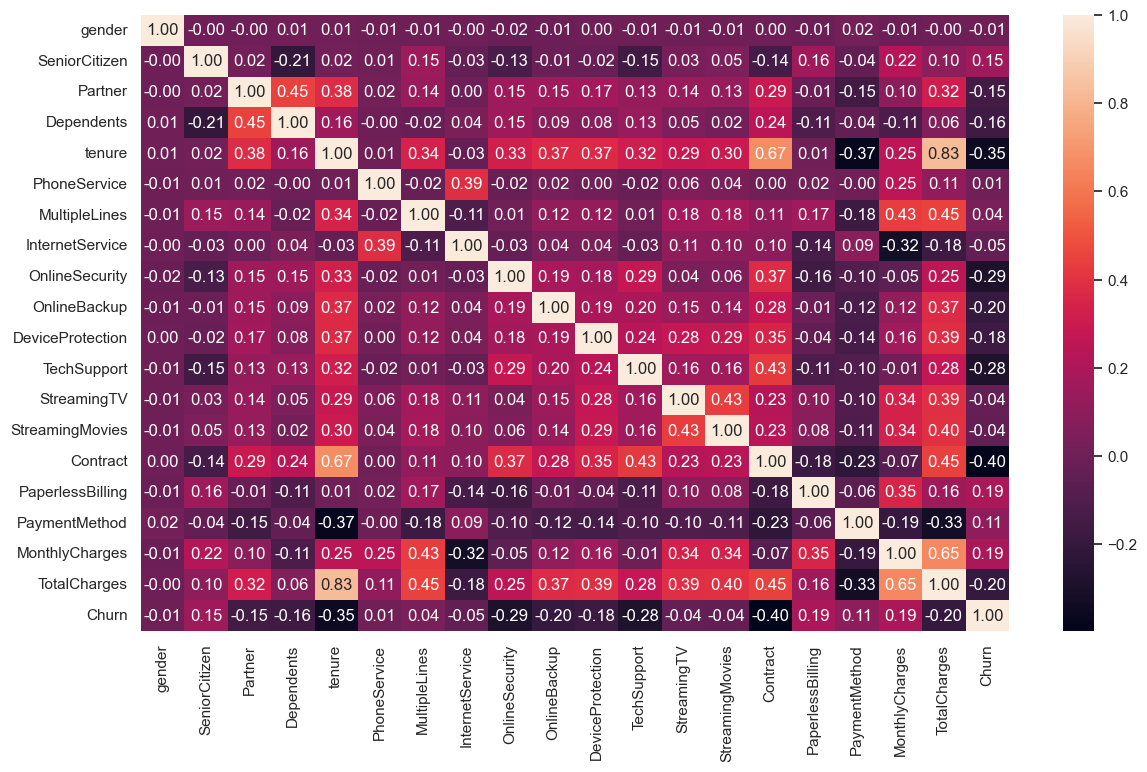

In [89]:
corr = df.iloc[:, 1:].corr()

plt.figure(figsize=(14,8))
# sns.set(font_scale=1)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

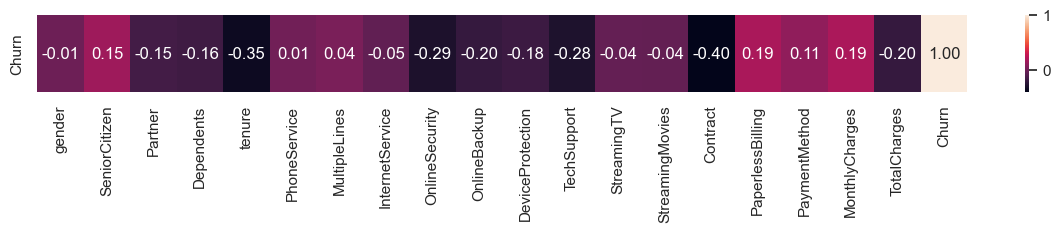

In [90]:
plt.figure(figsize=(15,1))
sns.set(font_scale=1)
sns.heatmap(corr.loc[['Churn'], :], annot=True, fmt='.2f')
plt.show()

### Scaling 'MonthlyCharges' & 'TotalCharges'

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df[['MonthlyCharges', 'TotalCharges', 'tenure']].columns
df[cols] = scaler.fit_transform(df[cols])

In [92]:
df_id = df[['customerID']]
df.drop('customerID', axis=1, inplace=True)

In [93]:
df.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2        0.115423      0.003437      0  
1                 0              3        0.385075      0.217564      0  
2                 1              3        0.354229      0.012453      1  
3                 0              0        0.239303      0.211951      0  
4                 1              2        0.521891      0.017462      1

### Checking Multicolinearity

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

X = df

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
X = add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

feature        VIF
1             gender   1.001950
2      SeniorCitizen   1.152187
3            Partner   1.460978
4         Dependents   1.383449
5             tenure   7.445249
6       PhoneService   1.633822
7      MultipleLines   1.395332
8    InternetService   1.836929
9     OnlineSecurity   1.277954
10      OnlineBackup   1.221185
11  DeviceProtection   1.299651
12       TechSupport   1.331357
13       StreamingTV   1.446759
14   StreamingMovies   1.446574
15          Contract   2.481013
16  PaperlessBilling   1.207431
17     PaymentMethod   1.187461
18    MonthlyCharges   5.183041
19      TotalCharges  10.697828
20             Churn   1.380218

## Classification Modelling

### Splitting Data

In [95]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score
import numpy as np

X = df.iloc[:, :-1]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# KFold Cross Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

def rounded_metric(metric):
    return round(metric, 3)

def confusion_classification_report(data_test, data_predict, title):
    conf_matrix = confusion_matrix(data_test, data_predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()
    
    print(f"Classification Report - {title}")
    print(classification_report(data_test, data_predict))

### ANN

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32)

y_prob_val = ann.predict(X_val)
y_pred_val = (y_prob_val > 0.5).astype(int)

accuracy_ann_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_ann_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_ann_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_ann_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

Epoch 1/10


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6920 - loss: 0.5634
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7763 - loss: 0.4492
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7802 - loss: 0.4416
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7763 - loss: 0.4422
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4298
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8026 - loss: 0.4211
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7923 - loss: 0.4276
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4103
Epoch 9/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7972 - loss: 0.4216
Epoch 10/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8095 - loss: 0.4119
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [98]:
y_prob_test = ann.predict(X_test)
y_pred_test = (y_prob_test > 0.5).astype(int)

# Calculate metrics on test data
accuracy_ann_test = round(accuracy_score(y_test, y_pred_test), 3)
f1_ann_test = round(f1_score(y_test, y_pred_test, average='weighted'), 3)
roc_auc_ann_test = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_ann_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_ann_val}\t| Test: {accuracy_ann_test}")
print(f"(F1 Score)          --> Avg. Validation: {f1_ann_val}\t| Test: {f1_ann_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_ann_val}\t| Test: {roc_auc_ann_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_ann_val}\t| Test: {balanced_accuracy_ann_test}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.798	| Test: 0.803
(F1 Score)          --> Avg. Validation: 0.799	| Test: 0.803
(ROC-AUC Score)     --> Avg. Validation: 0.735	| Test: 0.744
(Balanced Accuracy) --> Avg. Validation: 0.735	| Test: 0.744


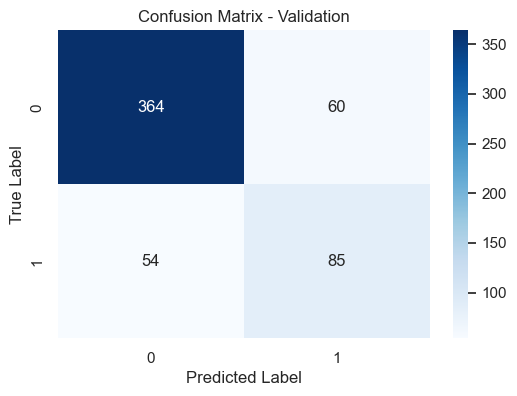

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       424
           1       0.59      0.61      0.60       139

    accuracy                           0.80       563
   macro avg       0.73      0.74      0.73       563
weighted avg       0.80      0.80      0.80       563



In [99]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

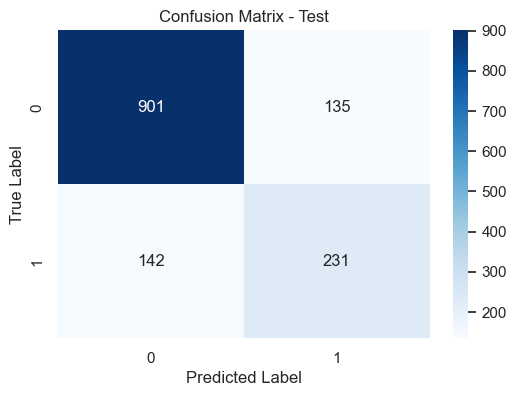

Classification Report - Test
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1036
           1       0.63      0.62      0.63       373

    accuracy                           0.80      1409
   macro avg       0.75      0.74      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [100]:
confusion_classification_report(y_test, y_pred_test, 'Test')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


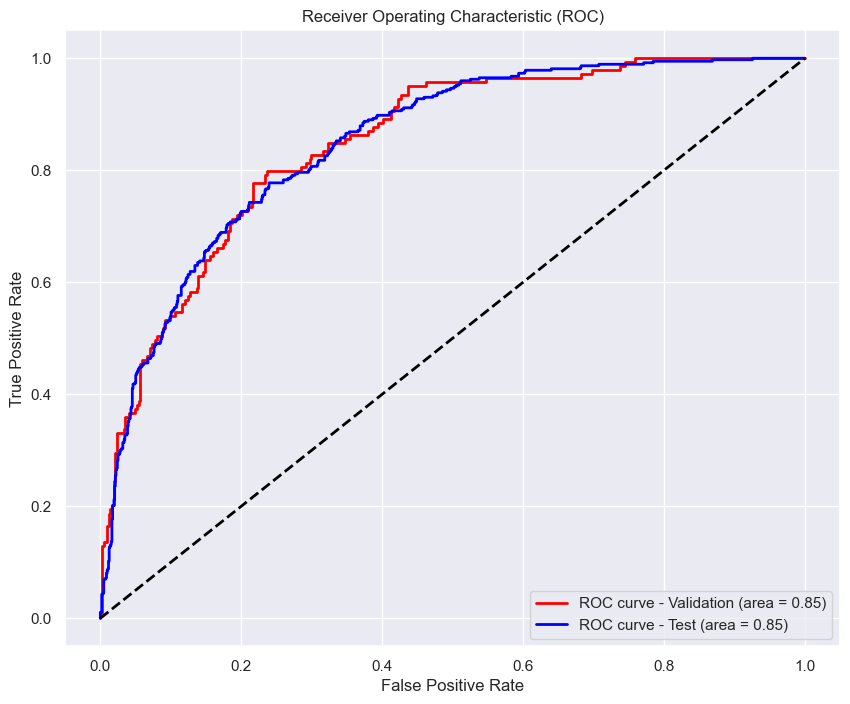

In [101]:
from sklearn.metrics import roc_curve, auc

y_prob_test = ann.predict(X_test)
y_prob_val = ann.predict(X_val)

fpr_ann_val, tpr_ann_val, _ = roc_curve(y_val, y_prob_val)
fpr_ann_test, tpr_ann_test, _ = roc_curve(y_test, y_prob_test)

roc_auc_ann_val = auc(fpr_ann_val, tpr_ann_val)
roc_auc_ann_test = auc(fpr_ann_test, tpr_ann_test)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_ann_val, tpr_ann_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_ann_val)
plt.plot(fpr_ann_test, tpr_ann_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_ann_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train_fold, y_train_fold)

y_pred_val = rfc.predict(X_val)

accuracy_rfc_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_rfc_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_rfc_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_rfc_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [103]:
rfc.fit(X_train, y_train)
y_pred_test = rfc.predict(X_test)

# Calculate metrics on test data
accuracy_rfc_test = round(accuracy_score(y_test, y_pred_test), 3)
f1_rfc_test = round(f1_score(y_test, y_pred_test, average='weighted'), 3)
roc_auc_rfc_test = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_rfc_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_rfc_val}\t| Test: {accuracy_rfc_test}")
print(f"(F1 Score)          --> Avg. Validation: {f1_rfc_val}\t| Test: {f1_rfc_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_rfc_val}\t| Test: {roc_auc_rfc_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_rfc_val}\t| Test: {balanced_accuracy_rfc_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.808	| Test: 0.797
(F1 Score)          --> Avg. Validation: 0.799	| Test: 0.786
(ROC-AUC Score)     --> Avg. Validation: 0.701	| Test: 0.697
(Balanced Accuracy) --> Avg. Validation: 0.701	| Test: 0.697


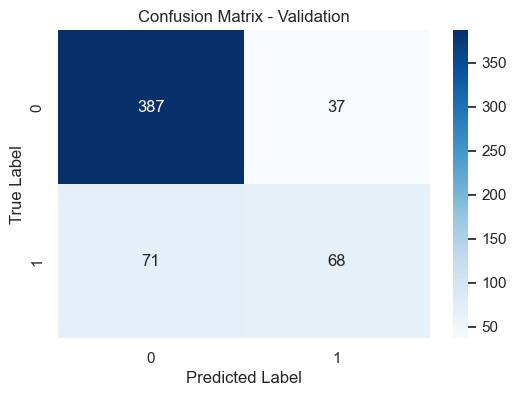

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       424
           1       0.65      0.49      0.56       139

    accuracy                           0.81       563
   macro avg       0.75      0.70      0.72       563
weighted avg       0.80      0.81      0.80       563



In [104]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

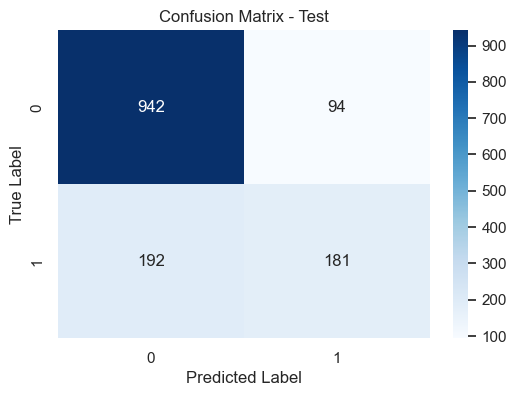

Classification Report - Test
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [105]:
confusion_classification_report(y_test, y_pred_test, 'Test')

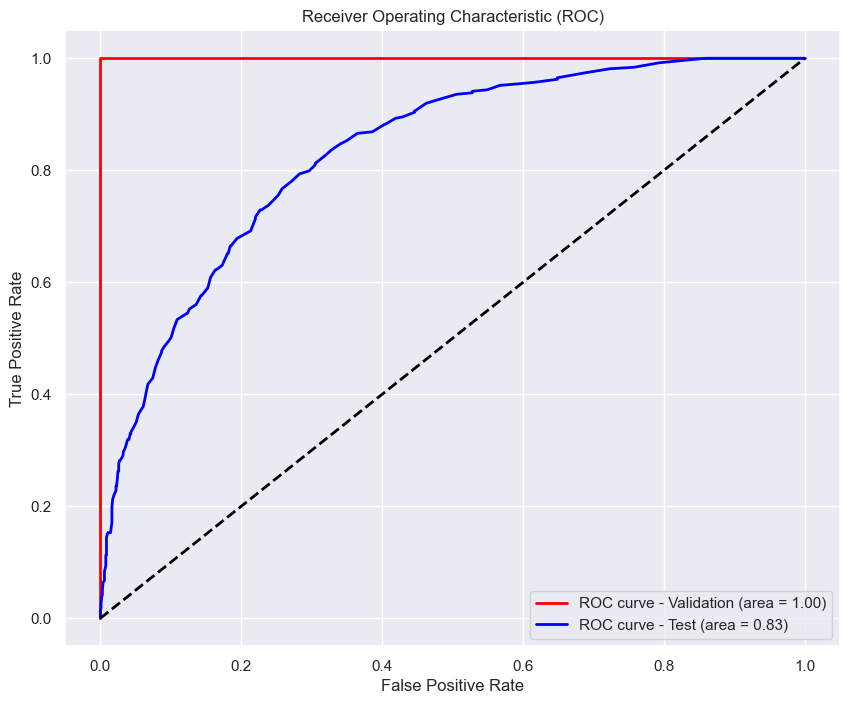

In [106]:
from sklearn.metrics import roc_curve, auc

fpr_rfc_val, tpr_rfc_val, _ = roc_curve(y_val, rfc.predict_proba(X_val)[:, 1])
fpr_rfc_test, tpr_rfc_test, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])

roc_auc_rfc_val = auc(fpr_rfc_val, tpr_rfc_val)
roc_auc_rfc_test = auc(fpr_rfc_test, tpr_rfc_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rfc_val, tpr_rfc_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_rfc_val)
plt.plot(fpr_rfc_test, tpr_rfc_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_rfc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Classifier

In [107]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()

lrc.fit(X_train_fold, y_train_fold)

y_pred_val = lrc.predict(X_val)

accuracy_lrc_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_lrc_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_lrc_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_lrc_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [108]:
lrc.fit(X_train, y_train)
y_pred_test = lrc.predict(X_test)

# Calculate metrics on test data
accuracy_lrc_test = round(accuracy_score(y_test, y_pred_test), 3)
f1_lrc_test = round(f1_score(y_test, y_pred_test, average='weighted'), 3)
roc_auc_lrc_test = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_lrc_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_lrc_val}\t| Test: {accuracy_lrc_test}")
print(f"(F1 Score)          --> Avg. Validation: {f1_lrc_val}\t| Test: {f1_lrc_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_lrc_val}\t| Test: {roc_auc_lrc_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_lrc_val}\t| Test: {balanced_accuracy_lrc_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.819	| Test: 0.816
(F1 Score)          --> Avg. Validation: 0.817	| Test: 0.811
(ROC-AUC Score)     --> Avg. Validation: 0.749	| Test: 0.74
(Balanced Accuracy) --> Avg. Validation: 0.749	| Test: 0.74


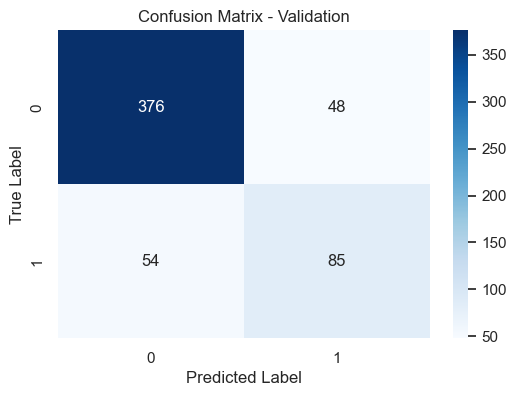

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       424
           1       0.64      0.61      0.62       139

    accuracy                           0.82       563
   macro avg       0.76      0.75      0.75       563
weighted avg       0.82      0.82      0.82       563



In [109]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

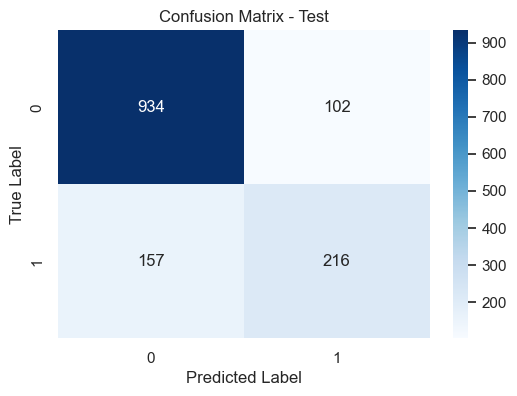

Classification Report - Test
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [110]:
confusion_classification_report(y_test, y_pred_test, 'Test')

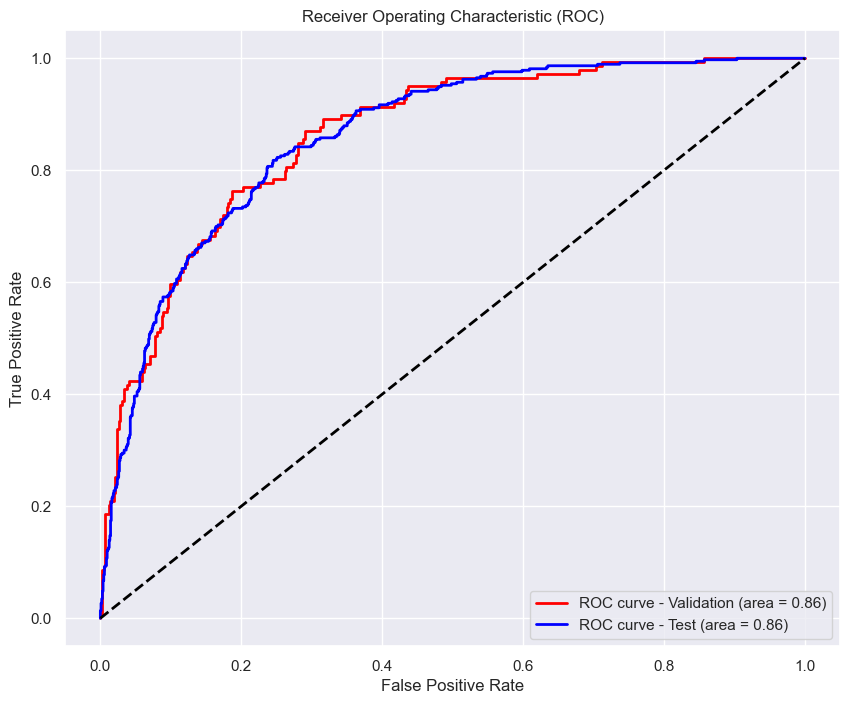

In [111]:
from sklearn.metrics import roc_curve, auc

fpr_lrc_val, tpr_lrc_val, _ = roc_curve(y_val, lrc.predict_proba(X_val)[:, 1])
fpr_lrc_test, tpr_lrc_test, _ = roc_curve(y_test, lrc.predict_proba(X_test)[:, 1])

roc_auc_lrc_val = auc(fpr_lrc_val, tpr_lrc_val)
roc_auc_lrc_test = auc(fpr_lrc_test, tpr_lrc_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_lrc_val, tpr_lrc_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_lrc_val)
plt.plot(fpr_lrc_test, tpr_lrc_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_lrc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### KNN Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_fold, y_train_fold)

y_pred_val = knn.predict(X_val)

accuracy_knn_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_knn_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_knn_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_knn_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [113]:
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

# Calculate average metrics on test data
accuracy_knn_test = accuracy_score(y_test, y_pred_test)
f1_knn_test = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_knn_test = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_knn_test = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_knn_val}\t| Test: {accuracy_knn_test}")
print(f"(F1 Score)          --> Avg. Validation: {f1_knn_val}\t| Test: {f1_knn_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_knn_val}\t| Test: {roc_auc_knn_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_knn_val}\t| Test: {balanced_accuracy_knn_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.746	| Test: 0.7558552164655784
(F1 Score)          --> Avg. Validation: 0.743	| Test: 0.7515017685689669
(ROC-AUC Score)     --> Avg. Validation: 0.648	| Test: 0.6701261295765317
(Balanced Accuracy) --> Avg. Validation: 0.648	| Test: 0.6701261295765317


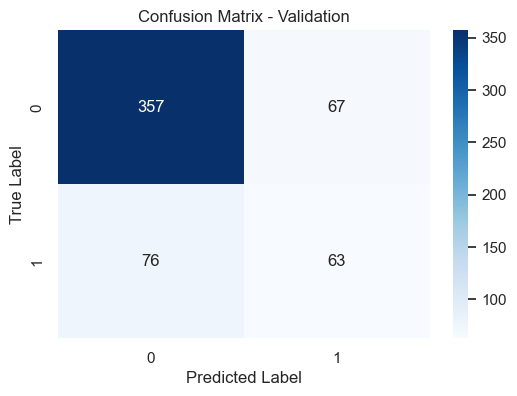

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       424
           1       0.48      0.45      0.47       139

    accuracy                           0.75       563
   macro avg       0.65      0.65      0.65       563
weighted avg       0.74      0.75      0.74       563



In [114]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

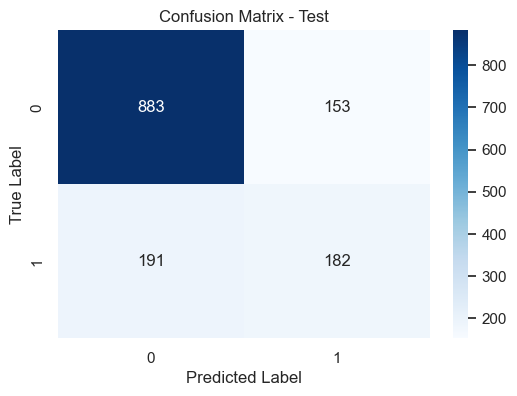

Classification Report - Test
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1036
           1       0.54      0.49      0.51       373

    accuracy                           0.76      1409
   macro avg       0.68      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



In [115]:
confusion_classification_report(y_test, y_pred_test, 'Test')

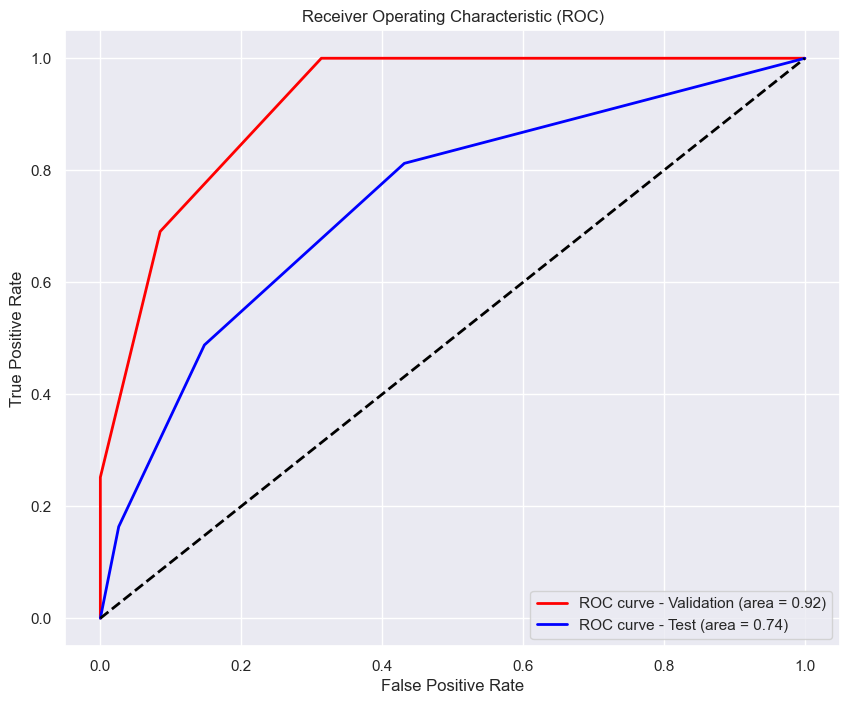

In [116]:
from sklearn.metrics import roc_curve, auc

fpr_knn_val, tpr_knn_val, _ = roc_curve(y_val, knn.predict_proba(X_val)[:, 1])
fpr_knn_test, tpr_knn_test, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

roc_auc_knn_val = auc(fpr_knn_val, tpr_knn_val)
roc_auc_knn_test = auc(fpr_knn_test, tpr_knn_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn_val, tpr_knn_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_knn_val)
plt.plot(fpr_knn_test, tpr_knn_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_knn_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Catboost

In [117]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

cbc.fit(X_train_fold, y_train_fold)

y_pred_val = cbc.predict(X_val)

accuracy_cbc_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_cbc_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_cbc_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_cbc_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [118]:
cbc.fit(X_train, y_train)
y_pred_test = cbc.predict(X_test)

# Calculate average metrics on test data
accuracy_cbc_test = accuracy_score(y_test, y_pred_test)
f1_cbc_test = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_cbc_test = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_cbc_test = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_cbc_val}\t| Test: {accuracy_cbc_test}")
print(f"(F1 Score)          --> Avg. Validation: {f1_cbc_val}\t| Test: {f1_cbc_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_cbc_val}\t| Test: {roc_auc_cbc_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_cbc_val}\t| Test: {balanced_accuracy_cbc_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.826	| Test: 0.8112136266855926
(F1 Score)          --> Avg. Validation: 0.821	| Test: 0.8036161647688497
(ROC-AUC Score)     --> Avg. Validation: 0.739	| Test: 0.7240702019522396
(Balanced Accuracy) --> Avg. Validation: 0.739	| Test: 0.7240702019522395


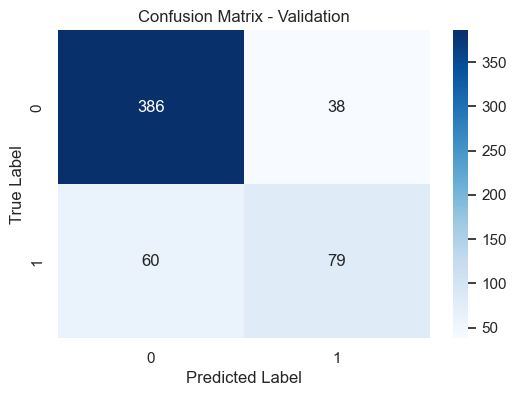

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       424
           1       0.68      0.57      0.62       139

    accuracy                           0.83       563
   macro avg       0.77      0.74      0.75       563
weighted avg       0.82      0.83      0.82       563



In [119]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

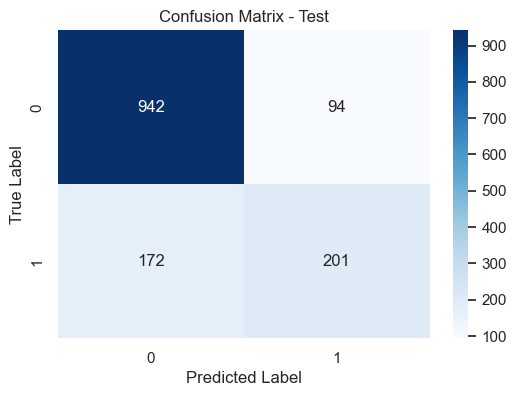

Classification Report - Test
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [120]:
confusion_classification_report(y_test, y_pred_test, 'Test')

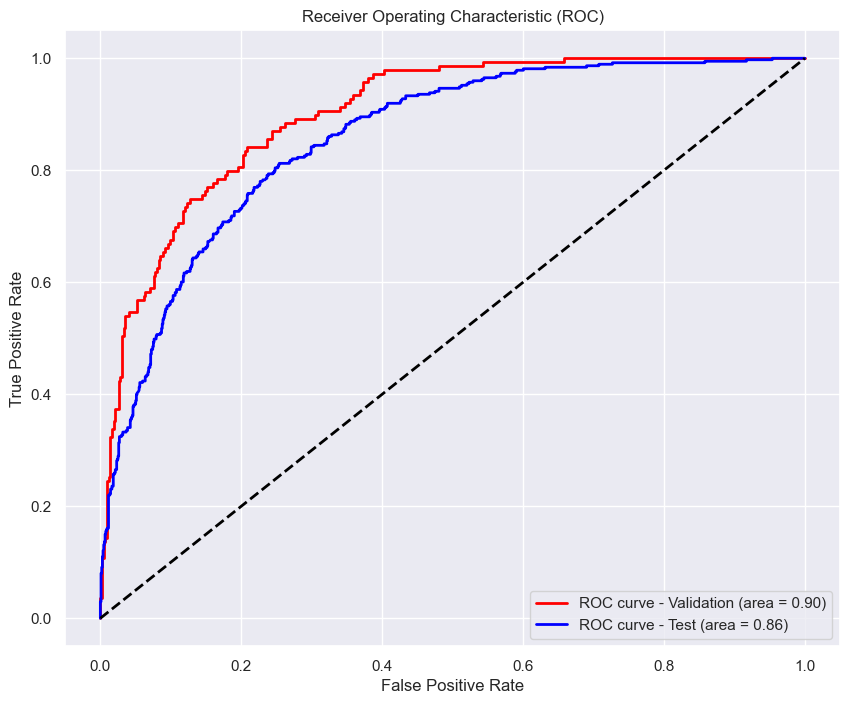

In [121]:
from sklearn.metrics import roc_curve, auc

fpr_cbc_val, tpr_cbc_val, _ = roc_curve(y_val, cbc.predict_proba(X_val)[:, 1])
fpr_cbc_test, tpr_cbc_test, _ = roc_curve(y_test, cbc.predict_proba(X_test)[:, 1])

roc_auc_cbc_val = auc(fpr_cbc_val, tpr_cbc_val)
roc_auc_cbc_test = auc(fpr_cbc_test, tpr_cbc_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_cbc_val, tpr_cbc_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_cbc_val)
plt.plot(fpr_cbc_test, tpr_cbc_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_cbc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Light GBM

In [123]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, random_state=42, verbose=0)

lgbm.fit(X_train_fold, y_train_fold)

y_pred_val = lgbm.predict(X_val)

accuracy_lgbm_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_lgbm_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_lgbm_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_lgbm_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))


In [124]:
lgbm.fit(X_train, y_train)
y_pred_test = lgbm.predict(X_test)

# Calculate average metrics on test data
accuracy_lgbm_test = accuracy_score(y_test, y_pred_test)
f1_lgbm_test = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_lgbm_test = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_lgbm_test = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_lgbm_val}\t| Test: {accuracy_lgbm_test}")
print(f"(F1 Score)          --> Avg. Validation: {f1_lgbm_val}\t| Test: {f1_lgbm_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_lgbm_val}\t| Test: {roc_auc_lgbm_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_lgbm_val}\t| Test: {balanced_accuracy_lgbm_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.817	| Test: 0.7998580553584103
(F1 Score)          --> Avg. Validation: 0.812	| Test: 0.7932344726226996
(ROC-AUC Score)     --> Avg. Validation: 0.731	| Test: 0.7146324800480297
(Balanced Accuracy) --> Avg. Validation: 0.731	| Test: 0.7146324800480297


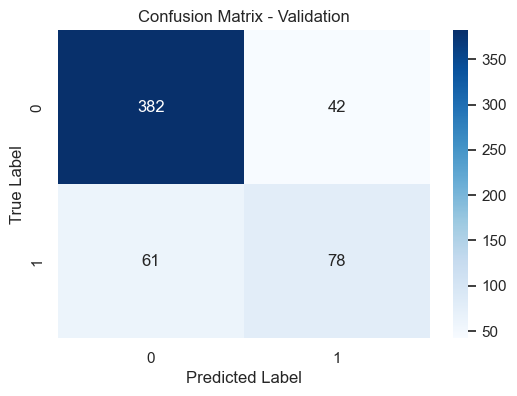

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       424
           1       0.65      0.56      0.60       139

    accuracy                           0.82       563
   macro avg       0.76      0.73      0.74       563
weighted avg       0.81      0.82      0.81       563



In [125]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

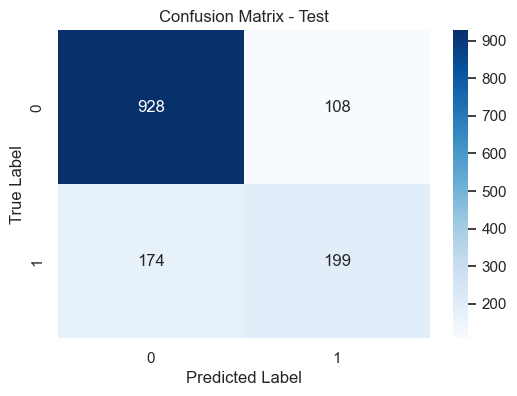

Classification Report - Test
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [126]:
confusion_classification_report(y_test, y_pred_test, 'Test')

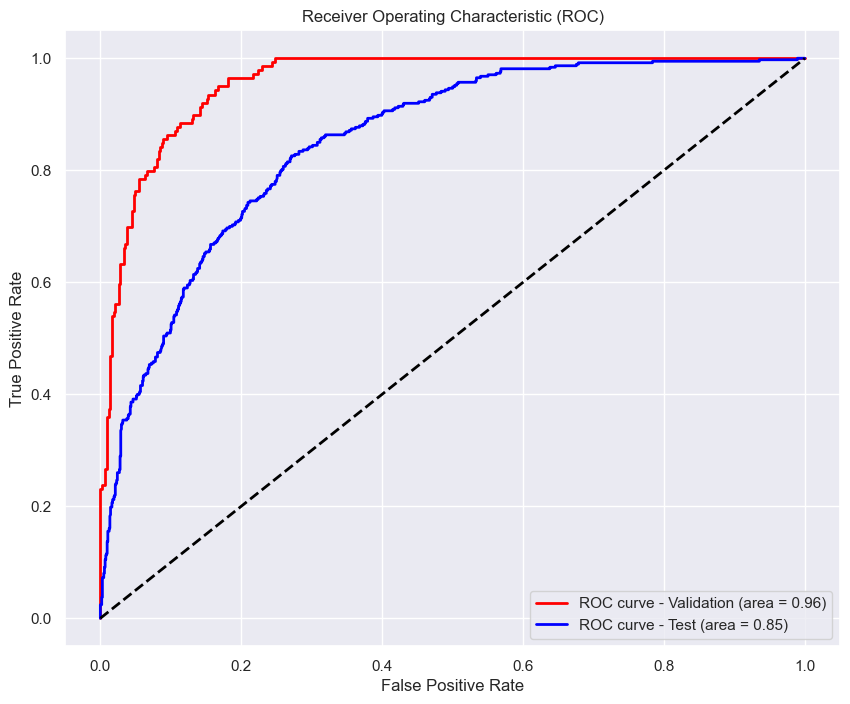

In [127]:
from sklearn.metrics import roc_curve, auc

fpr_lgbm_val, tpr_lgbm_val, _ = roc_curve(y_val, lgbm.predict_proba(X_val)[:, 1])
fpr_lgbm_test, tpr_lgbm_test, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:, 1])

roc_auc_lgbm_val = auc(fpr_lgbm_val, tpr_lgbm_val)
roc_auc_lgbm_test = auc(fpr_lgbm_test, tpr_lgbm_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_lgbm_val, tpr_lgbm_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_lgbm_val)
plt.plot(fpr_lgbm_test, tpr_lgbm_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_lgbm_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Evaluation

In [194]:
df_metric = pd.DataFrame({
    'Model Name':['Random Forest', 'Logistic Regression', 'KNN', 'Catboost', 'Light GBM', 'ANN'],
    '(Train) Balanced Accuracy':[balanced_accuracy_rfc_val, balanced_accuracy_lrc_val, balanced_accuracy_knn_val, balanced_accuracy_cbc_val, balanced_accuracy_lgbm_val, balanced_accuracy_ann_val],
    '(Test) Balanced Accuracy':[balanced_accuracy_rfc_test, balanced_accuracy_lrc_test, balanced_accuracy_knn_test, balanced_accuracy_cbc_test, balanced_accuracy_lgbm_test, balanced_accuracy_ann_test],
    '(Train) F-1 Score':[f1_rfc_val, f1_lrc_val, f1_knn_val, f1_cbc_val, f1_lgbm_val, f1_ann_val],
    '(Test) F-1 Score':[f1_rfc_test, f1_lrc_test, f1_knn_test, f1_cbc_test, f1_lgbm_test, f1_ann_test],
    '(Train) ROC-AUC Score':[roc_auc_rfc_val, roc_auc_lrc_val, roc_auc_knn_val, roc_auc_cbc_val, roc_auc_lgbm_val, roc_auc_ann_val],
    '(Test) ROC-AUC Score':[roc_auc_rfc_test, roc_auc_lrc_test, roc_auc_knn_test, roc_auc_cbc_test, roc_auc_lgbm_test, roc_auc_ann_test],
    '(Train) Accuracy Score':[accuracy_rfc_val, accuracy_lrc_val, accuracy_knn_val, accuracy_cbc_val, accuracy_lgbm_val, accuracy_ann_val],
    '(Test) Accuracy Score':[accuracy_rfc_test, accuracy_lrc_test, accuracy_knn_test, accuracy_cbc_test, accuracy_lgbm_test, accuracy_ann_test],
})

df_metric.sort_values(by=['(Train) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

Model Name  (Train) Balanced Accuracy  (Test) Balanced Accuracy  \
0  Logistic Regression                      0.749                  0.740000   
1             Catboost                      0.739                  0.724070   
2                  ANN                      0.735                  0.744000   
3            Light GBM                      0.731                  0.714632   
4        Random Forest                      0.701                  0.697000   
5                  KNN                      0.648                  0.670126   

   (Train) F-1 Score  (Test) F-1 Score  (Train) ROC-AUC Score  \
0              0.817          0.811000               0.862631   
1              0.821          0.803616               0.900876   
2              0.799          0.803000               0.849209   
3              0.812          0.793234               0.958141   
4              0.799          0.786000               1.000000   
5              0.743          0.751502               0.919718   

   (Test) ROC-AUC Score  (Train) Accuracy Score  (Test) Accuracy Score  
0              0.860645                   0.819               0.816000  
1              0.856558                   0.826               0.811214  
2              0.848413                   0.798               0.803000  
3              0.851274                   0.817               0.799858  
4              0.832600                   0.808               0.797000  
5              0.741430                   0.746               0.755855

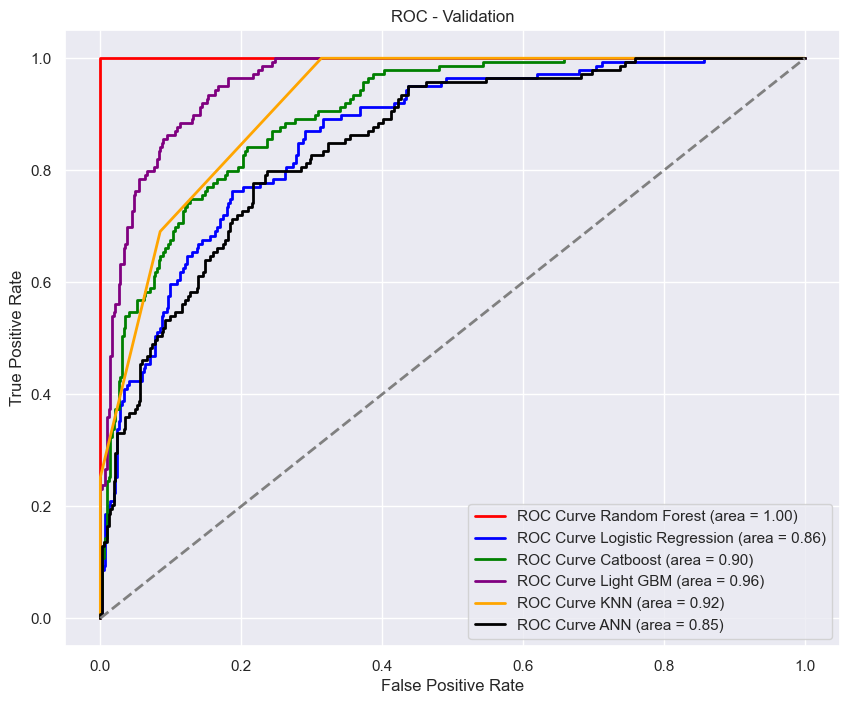

In [129]:
# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8)) 
plt.plot(fpr_rfc_val, tpr_rfc_val, color='red', lw=2, label='ROC Curve Random Forest (area = %0.2f)' % roc_auc_rfc_val)
plt.plot(fpr_lrc_val, tpr_lrc_val, color='blue', lw=2, label='ROC Curve Logistic Regression (area = %0.2f)' % roc_auc_lrc_val)
plt.plot(fpr_cbc_val, tpr_cbc_val, color='green', lw=2, label='ROC Curve Catboost (area = %0.2f)' % roc_auc_cbc_val)
plt.plot(fpr_lgbm_val, tpr_lgbm_val, color='purple', lw=2, label='ROC Curve Light GBM (area = %0.2f)' % roc_auc_lgbm_val)
plt.plot(fpr_knn_val, tpr_knn_val, color='orange', lw=2, label='ROC Curve KNN (area = %0.2f)' % roc_auc_knn_val)
plt.plot(fpr_ann_val, tpr_ann_val, color='black', lw=2, label='ROC Curve ANN (area = %0.2f)' % roc_auc_ann_val)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Validation')
plt.legend(loc="lower right")
plt.show()

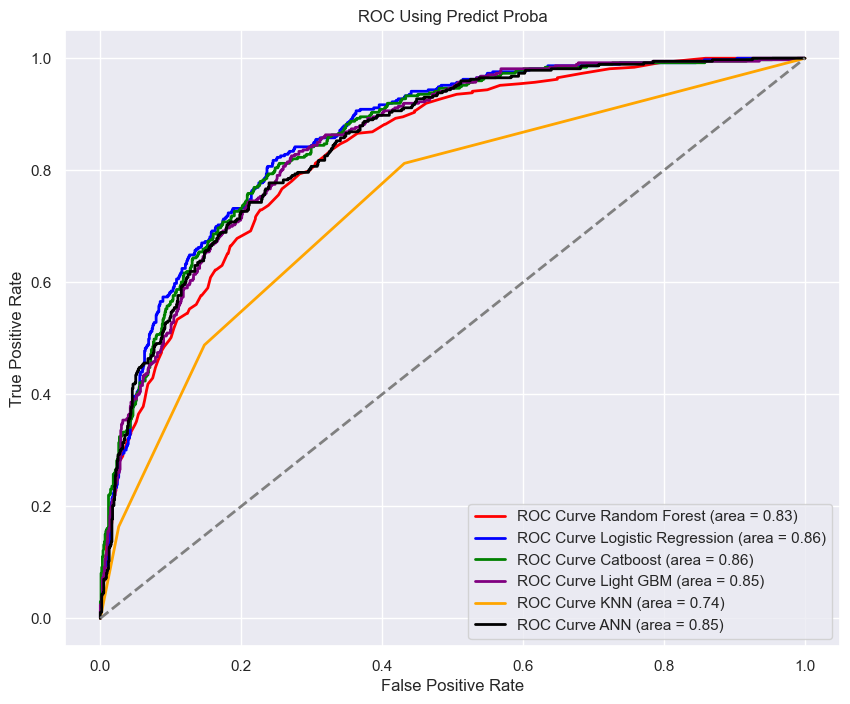

In [130]:
# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8)) 
plt.plot(fpr_rfc_test, tpr_rfc_test, color='red', lw=2, label='ROC Curve Random Forest (area = %0.2f)' % roc_auc_rfc_test)
plt.plot(fpr_lrc_test, tpr_lrc_test, color='blue', lw=2, label='ROC Curve Logistic Regression (area = %0.2f)' % roc_auc_lrc_test)
plt.plot(fpr_cbc_test, tpr_cbc_test, color='green', lw=2, label='ROC Curve Catboost (area = %0.2f)' % roc_auc_cbc_test)
plt.plot(fpr_lgbm_test, tpr_lgbm_test, color='purple', lw=2, label='ROC Curve Light GBM (area = %0.2f)' % roc_auc_lgbm_test)
plt.plot(fpr_knn_test, tpr_knn_test, color='orange', lw=2, label='ROC Curve KNN (area = %0.2f)' % roc_auc_knn_test)
plt.plot(fpr_ann_test, tpr_ann_test, color='black', lw=2, label='ROC Curve ANN (area = %0.2f)' % roc_auc_ann_test)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Using Predict Proba')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

### ANN

In [133]:
best_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

best_ann.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
best_ann.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32)

y_prob_val = best_ann.predict(X_val)
y_pred_val = (y_prob_val > 0.5).astype(int)

accuracy_best_ann_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_best_ann_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_best_ann_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_best_ann_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7593 - loss: 0.4807
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7847 - loss: 0.4430
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.4401
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.4301
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4270
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4201
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4161
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8059 - loss: 0.4092
Epoch 9/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8145 - loss: 0.4052
Epoch 10/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.4163
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [134]:
y_prob_test = best_ann.predict(X_test)
y_pred_test = (y_prob_test > 0.5).astype(int)

# Calculate metrics on test data
accuracy_best_test_ann = round(accuracy_score(y_test, y_pred_test), 3)
f1_best_test_ann = round(f1_score(y_test, y_pred_test, average='weighted'), 3)
roc_auc_best_test_ann = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_best_test_ann = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_best_ann_val}\t| Test: {accuracy_best_test_ann}")
print(f"(F1 Score)          --> Avg. Validation: {f1_best_ann_val}\t| Test: {f1_best_test_ann}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_best_ann_val}\t| Test: {roc_auc_best_test_ann}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_best_ann_val}\t| Test: {balanced_accuracy_best_test_ann}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.798	| Test: 0.792
(F1 Score)          --> Avg. Validation: 0.804	| Test: 0.796
(ROC-AUC Score)     --> Avg. Validation: 0.764	| Test: 0.755
(Balanced Accuracy) --> Avg. Validation: 0.764	| Test: 0.755


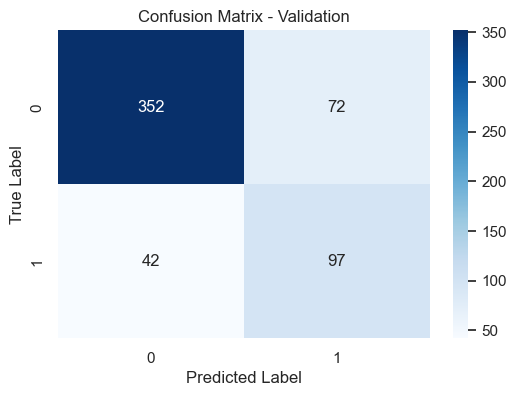

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       424
           1       0.57      0.70      0.63       139

    accuracy                           0.80       563
   macro avg       0.73      0.76      0.75       563
weighted avg       0.81      0.80      0.80       563



In [135]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

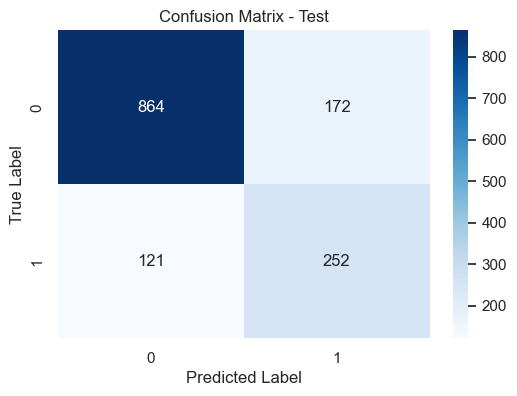

Classification Report - Test
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1036
           1       0.59      0.68      0.63       373

    accuracy                           0.79      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.79      0.80      1409



In [136]:
confusion_classification_report(y_test, y_pred_test, 'Test')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


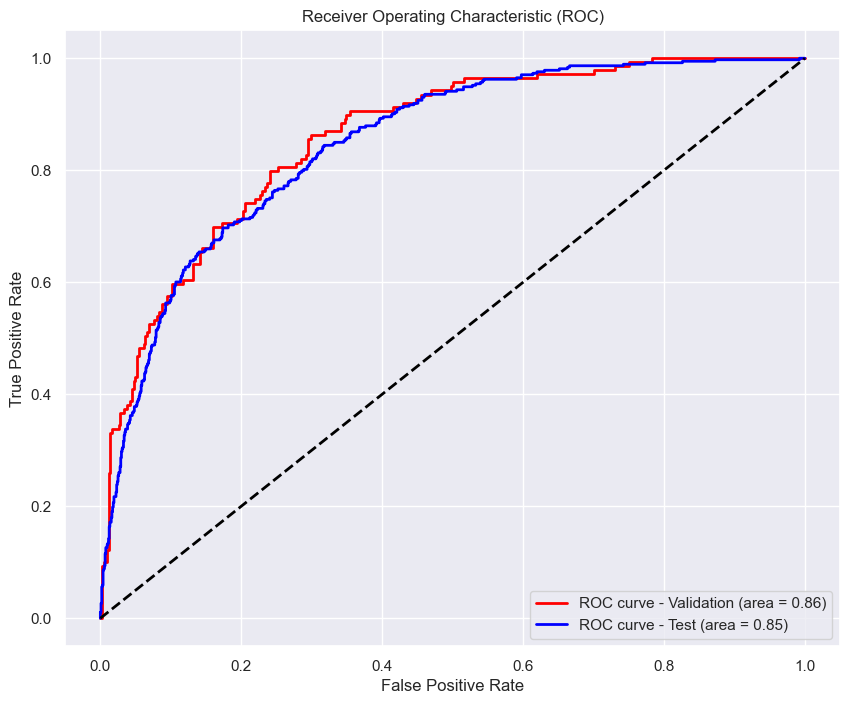

In [137]:
from sklearn.metrics import roc_curve, auc

y_prob_test = best_ann.predict(X_test)
y_prob_val = best_ann.predict(X_val)

fpr_best_ann_val, tpr_best_ann_val, _ = roc_curve(y_val, y_prob_val)
fpr_best_ann_test, tpr_best_ann_test, _ = roc_curve(y_test, y_prob_test)

roc_auc_best_ann_val = auc(fpr_best_ann_val, tpr_best_ann_val)
roc_auc_best_ann_test = auc(fpr_best_ann_test, tpr_best_ann_test)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_ann_val, tpr_best_ann_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_best_ann_val)
plt.plot(fpr_best_ann_test, tpr_best_ann_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_best_ann_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Catboost

In [72]:
from sklearn.model_selection import GridSearchCV

cbc = CatBoostClassifier(random_state=42, verbose=False)

cbc_param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

cbc_grid_search = GridSearchCV(cbc, cbc_param_grid, cv=5, scoring='balanced_accuracy', verbose=1)
cbc_grid_search.fit(X_train, y_train)
print("Best parameters for CatBoost:", cbc_grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for CatBoost: {'border_count': 128, 'depth': 4, 'iterations': 150, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [139]:
# best_cbc = cbc_grid_search.best_estimator_

best_cbc = CatBoostClassifier(border_count=128, depth=4, iterations=150, l2_leaf_reg=3, learning_rate=0.3)

best_cbc.fit(X_train_fold, y_train_fold)

y_pred_val = best_cbc.predict(X_val)

accuracy_best_cbc_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_best_cbc_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_best_cbc_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_best_cbc_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

0:	learn: 0.5985744	total: 1.41ms	remaining: 210ms
1:	learn: 0.5401296	total: 2.83ms	remaining: 210ms
2:	learn: 0.5056580	total: 5.59ms	remaining: 274ms
3:	learn: 0.4792962	total: 7.18ms	remaining: 262ms
4:	learn: 0.4619067	total: 8.53ms	remaining: 247ms
5:	learn: 0.4502518	total: 9.88ms	remaining: 237ms
6:	learn: 0.4409985	total: 11.3ms	remaining: 232ms
7:	learn: 0.4347741	total: 12.7ms	remaining: 226ms
8:	learn: 0.4302689	total: 14ms	remaining: 219ms
9:	learn: 0.4262785	total: 15.3ms	remaining: 214ms
10:	learn: 0.4227136	total: 16.8ms	remaining: 212ms
11:	learn: 0.4200913	total: 18.7ms	remaining: 215ms
12:	learn: 0.4186567	total: 20ms	remaining: 210ms
13:	learn: 0.4166356	total: 21.2ms	remaining: 206ms
14:	learn: 0.4149285	total: 23.2ms	remaining: 208ms
15:	learn: 0.4134307	total: 24.9ms	remaining: 208ms
16:	learn: 0.4124775	total: 26.1ms	remaining: 204ms
17:	learn: 0.4107036	total: 27.4ms	remaining: 201ms
18:	learn: 0.4103069	total: 28.5ms	remaining: 197ms
19:	learn: 0.4092181	total

In [140]:
best_cbc.fit(X_train, y_train)
y_pred_test = best_cbc.predict(X_test)

# Calculate average metrics on test data
accuracy_cbc_test_best = accuracy_score(y_test, y_pred_test)
f1_cbc_test_best = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_cbc_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_cbc_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_best_cbc_val}\t| Test: {accuracy_cbc_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {f1_best_cbc_val}\t| Test: {f1_cbc_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_best_cbc_val}\t| Test: {roc_auc_cbc_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_best_cbc_val}\t| Test: {balanced_accuracy_cbc_test_best}")

0:	learn: 0.5972244	total: 1.26ms	remaining: 189ms
1:	learn: 0.5372083	total: 2.66ms	remaining: 197ms
2:	learn: 0.5017578	total: 3.99ms	remaining: 196ms
3:	learn: 0.4751110	total: 6.06ms	remaining: 221ms
4:	learn: 0.4578031	total: 7.68ms	remaining: 223ms
5:	learn: 0.4464136	total: 9.51ms	remaining: 228ms
6:	learn: 0.4375131	total: 11ms	remaining: 225ms
7:	learn: 0.4298656	total: 12.4ms	remaining: 220ms
8:	learn: 0.4257787	total: 14.1ms	remaining: 220ms
9:	learn: 0.4226908	total: 15.3ms	remaining: 214ms
10:	learn: 0.4190431	total: 16.7ms	remaining: 211ms
11:	learn: 0.4161185	total: 18.4ms	remaining: 211ms
12:	learn: 0.4150714	total: 19.9ms	remaining: 210ms
13:	learn: 0.4133892	total: 21.3ms	remaining: 207ms
14:	learn: 0.4115318	total: 22.8ms	remaining: 205ms
15:	learn: 0.4102424	total: 24.1ms	remaining: 202ms
16:	learn: 0.4091941	total: 26ms	remaining: 203ms
17:	learn: 0.4076413	total: 27.2ms	remaining: 200ms
18:	learn: 0.4070654	total: 28.5ms	remaining: 196ms
19:	learn: 0.4062039	total

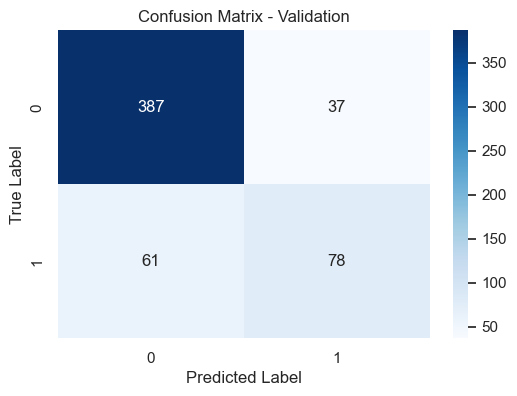

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       424
           1       0.68      0.56      0.61       139

    accuracy                           0.83       563
   macro avg       0.77      0.74      0.75       563
weighted avg       0.82      0.83      0.82       563



In [141]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

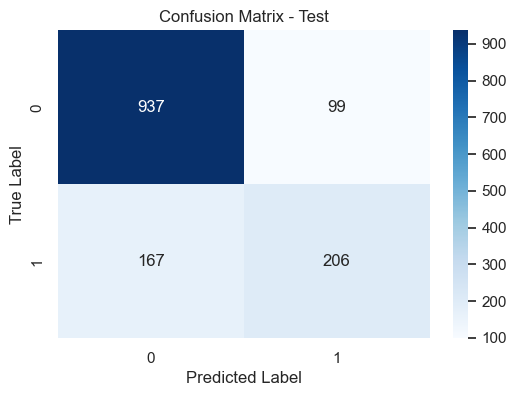

Classification Report - Test
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [142]:
confusion_classification_report(y_test, y_pred_test, 'Test')

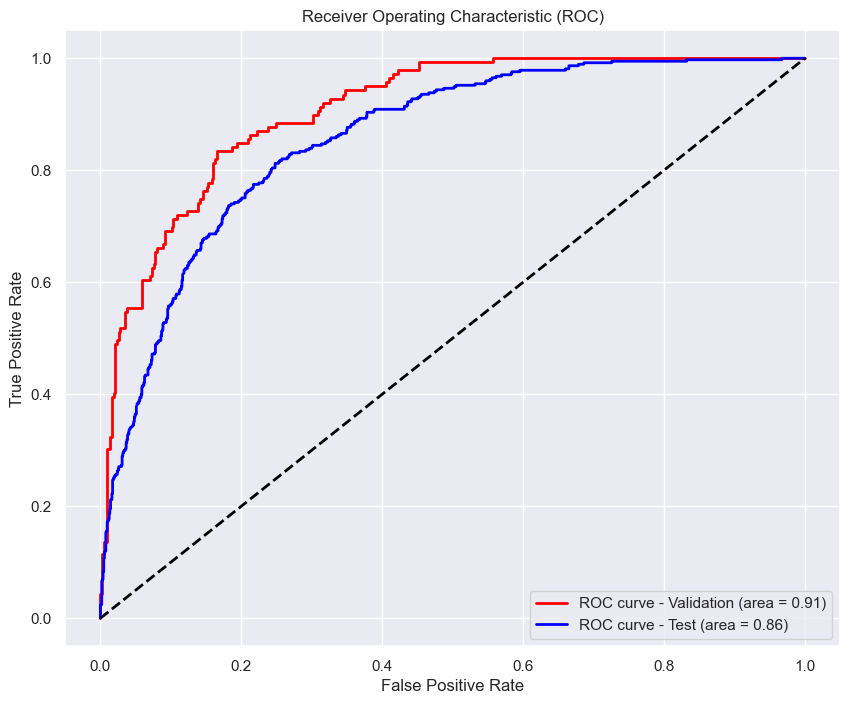

In [143]:
from sklearn.metrics import roc_curve, auc

fpr_best_cbc_val, tpr_best_cbc_val, _ = roc_curve(y_val, best_cbc.predict_proba(X_val)[:, 1])
fpr_best_cbc_test, tpr_best_cbc_test, _ = roc_curve(y_test, best_cbc.predict_proba(X_test)[:, 1])

roc_auc_best_cbc_val = auc(fpr_best_cbc_val, tpr_best_cbc_val)
roc_auc_best_cbc_test = auc(fpr_best_cbc_test, tpr_best_cbc_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_cbc_val, tpr_best_cbc_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_best_cbc_val)
plt.plot(fpr_best_cbc_test, tpr_best_cbc_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_best_cbc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [78]:
lrc = LogisticRegression()

lrc_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lrc_grid_search = GridSearchCV(lrc, lrc_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
lrc_grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lrc_grid_search.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters for Logistic Regression: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [145]:
# best_lrc = lrc_grid_search.best_estimator_

best_lrc = LogisticRegression(C=10, penalty='l1', solver='liblinear')

best_lrc.fit(X_train_fold, y_train_fold)

y_pred_val = best_lrc.predict(X_val)

accuracy_best_lrc_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_best_lrc_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_best_lrc_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_best_lrc_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [146]:
best_lrc.fit(X_train, y_train)
y_pred_test = best_lrc.predict(X_test)

# Calculate average metrics on test data
accuracy_lrc_test_best = accuracy_score(y_test, y_pred_test)
f1_lrc_test_best = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_lrc_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_lrc_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_best_lrc_val}\t| Test: {accuracy_lrc_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {f1_best_lrc_val}\t| Test: {f1_lrc_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_best_lrc_val}\t| Test: {roc_auc_lrc_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_best_lrc_val}\t| Test: {balanced_accuracy_lrc_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.817	| Test: 0.815471965933286
(F1 Score)          --> Avg. Validation: 0.817	| Test: 0.8106156613700509
(ROC-AUC Score)     --> Avg. Validation: 0.753	| Test: 0.7398338112145082
(Balanced Accuracy) --> Avg. Validation: 0.753	| Test: 0.7398338112145083


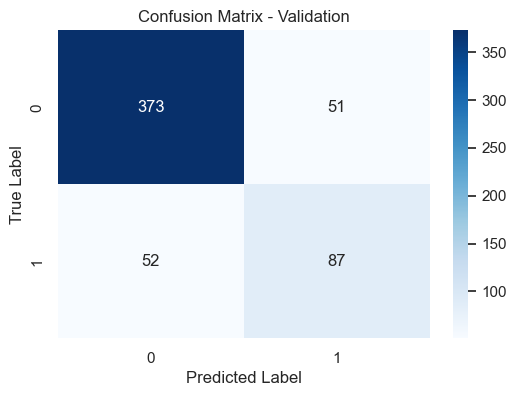

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       424
           1       0.63      0.63      0.63       139

    accuracy                           0.82       563
   macro avg       0.75      0.75      0.75       563
weighted avg       0.82      0.82      0.82       563



In [147]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

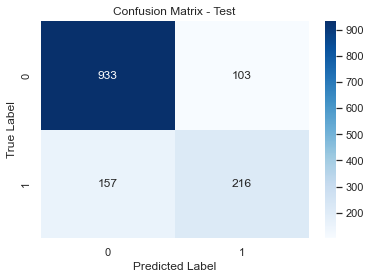

Classification Report - Test
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [82]:
confusion_classification_report(y_test, y_pred_test, 'Test')

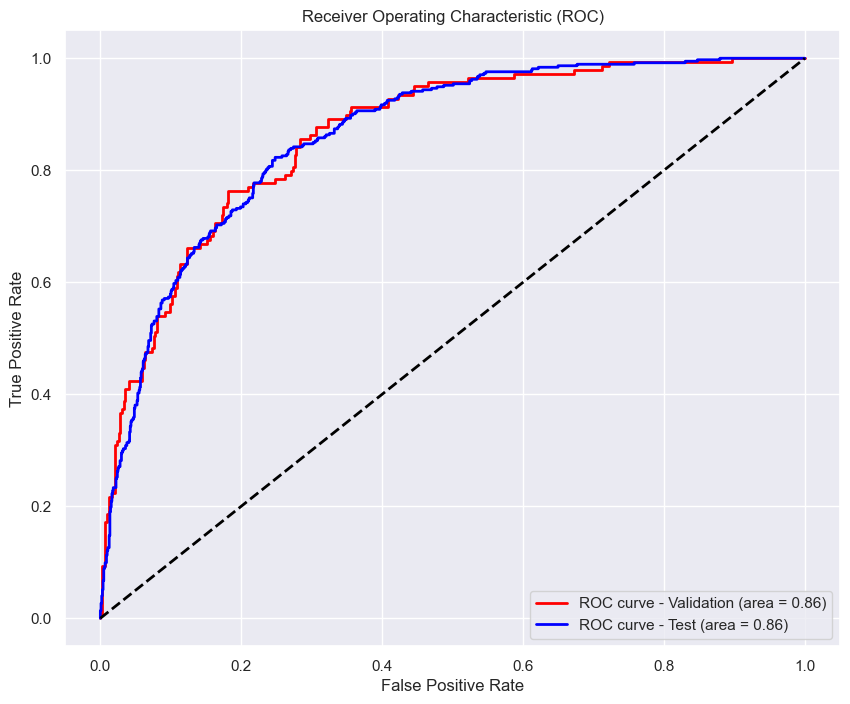

In [148]:
from sklearn.metrics import roc_curve, auc

fpr_best_lrc_val, tpr_best_lrc_val, _ = roc_curve(y_val, best_lrc.predict_proba(X_val)[:, 1])
fpr_best_lrc_test, tpr_best_lrc_test, _ = roc_curve(y_test, best_lrc.predict_proba(X_test)[:, 1])

roc_auc_best_lrc_val = auc(fpr_best_lrc_val, tpr_best_lrc_val)
roc_auc_best_lrc_test = auc(fpr_best_lrc_test, tpr_best_lrc_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_lrc_val, tpr_best_lrc_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_best_lrc_val)
plt.plot(fpr_best_lrc_test, tpr_best_lrc_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_best_lrc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### KNN

In [84]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNN:", knn_grid_search.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best parameters for KNN: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


In [149]:
# best_knn = knn_grid_search.best_estimator_

best_knn = KNeighborsClassifier(n_neighbors=15, p=1, weights='uniform')

best_knn.fit(X_train_fold, y_train_fold)

y_pred_val = best_knn.predict(X_val)

accuracy_best_knn_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_best_knn_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_best_knn_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_best_knn_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [150]:
best_knn.fit(X_train, y_train)
y_pred_test = best_knn.predict(X_test)

# Calculate average metrics on test data
accuracy_knn_test_best = accuracy_score(y_test, y_pred_test)
f1_knn_test_best = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_knn_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_knn_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_best_knn_val}\t| Test: {accuracy_knn_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {f1_best_knn_val}\t| Test: {f1_knn_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_best_knn_val}\t| Test: {roc_auc_knn_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_best_knn_val}\t| Test: {balanced_accuracy_knn_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.792	| Test: 0.7892122072391767
(F1 Score)          --> Avg. Validation: 0.792	| Test: 0.7870164967157476
(ROC-AUC Score)     --> Avg. Validation: 0.722	| Test: 0.7194030970840622
(Balanced Accuracy) --> Avg. Validation: 0.722	| Test: 0.7194030970840622


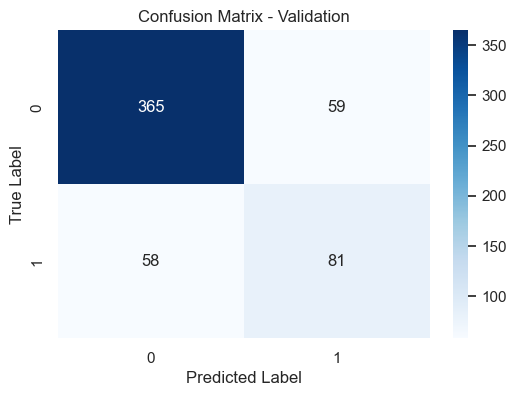

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       424
           1       0.58      0.58      0.58       139

    accuracy                           0.79       563
   macro avg       0.72      0.72      0.72       563
weighted avg       0.79      0.79      0.79       563



In [151]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

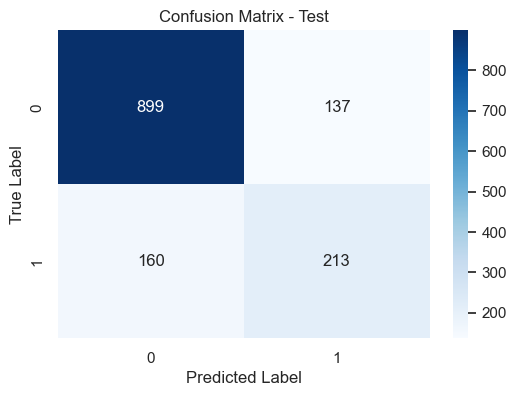

Classification Report - Test
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [152]:
confusion_classification_report(y_test, y_pred_test, 'Test')

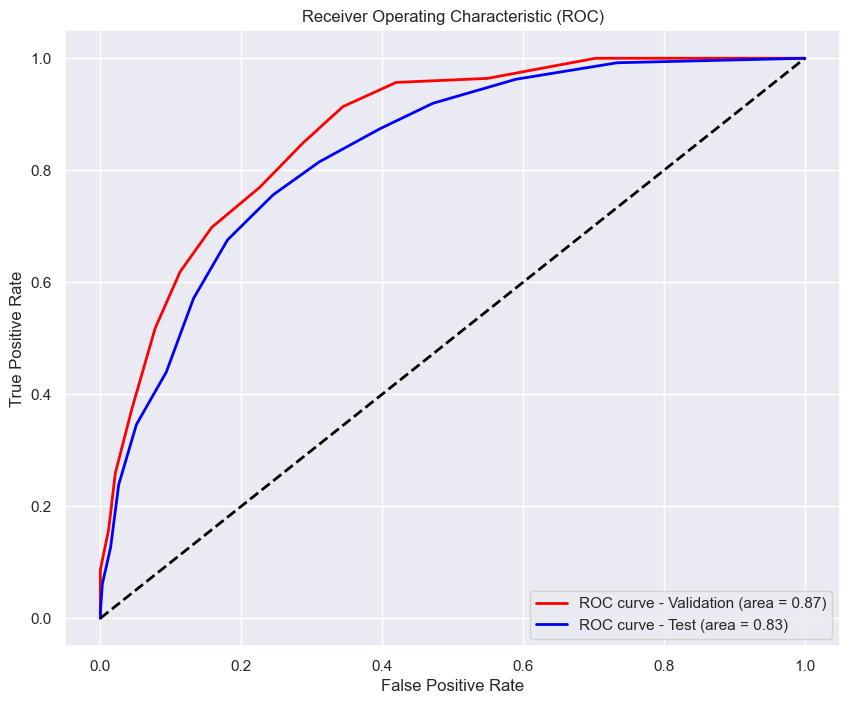

In [153]:
from sklearn.metrics import roc_curve, auc

fpr_best_knn_val, tpr_best_knn_val, _ = roc_curve(y_val, best_knn.predict_proba(X_val)[:, 1])
fpr_best_knn_test, tpr_best_knn_test, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])

roc_auc_best_knn_val = auc(fpr_best_knn_val, tpr_best_knn_val)
roc_auc_best_knn_test = auc(fpr_best_knn_test, tpr_best_knn_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_knn_val, tpr_best_knn_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_best_knn_val)
plt.plot(fpr_best_knn_test, tpr_best_knn_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_best_knn_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Light GBM

In [90]:
lgbm = LGBMClassifier(random_state=42, verbose=0)

lgbm_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 40]
}

lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
lgbm_grid_search.fit(X_train, y_train)

print("Best parameters for LightGBM:", lgbm_grid_search.best_params_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [154]:
# best_lgbm = lgbm_grid_search.best_estimator_

best_lgbm = LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)

best_lgbm.fit(X_train_fold, y_train_fold)

y_pred_val = best_lgbm.predict(X_val)

accuracy_best_lgbm_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_best_lgbm_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_best_lgbm_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_best_lgbm_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))


[LightGBM] [Info] Number of positive: 1357, number of negative: 3714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267600 -> initscore=-1.006833
[LightGBM] [Info] Start training from score -1.006833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [155]:
best_lgbm.fit(X_train, y_train)
y_pred_test = best_lgbm.predict(X_test)

# Calculate average metrics on test data
accuracy_lgbm_test_best = accuracy_score(y_test, y_pred_test)
f1_lgbm_test_best = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_lgbm_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_lgbm_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_best_lgbm_val}\t| Test: {accuracy_lgbm_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {f1_best_lgbm_val}\t| Test: {f1_lgbm_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_best_lgbm_val}\t| Test: {roc_auc_lgbm_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_best_lgbm_val}\t| Test: {balanced_accuracy_lgbm_test_best}")

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

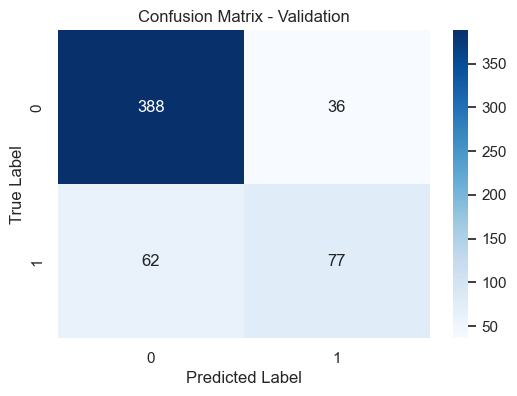

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       424
           1       0.68      0.55      0.61       139

    accuracy                           0.83       563
   macro avg       0.77      0.73      0.75       563
weighted avg       0.82      0.83      0.82       563



In [156]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

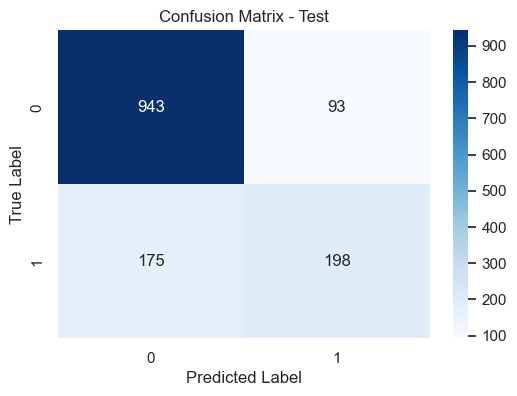

Classification Report - Test
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [157]:
confusion_classification_report(y_test, y_pred_test, 'Test')

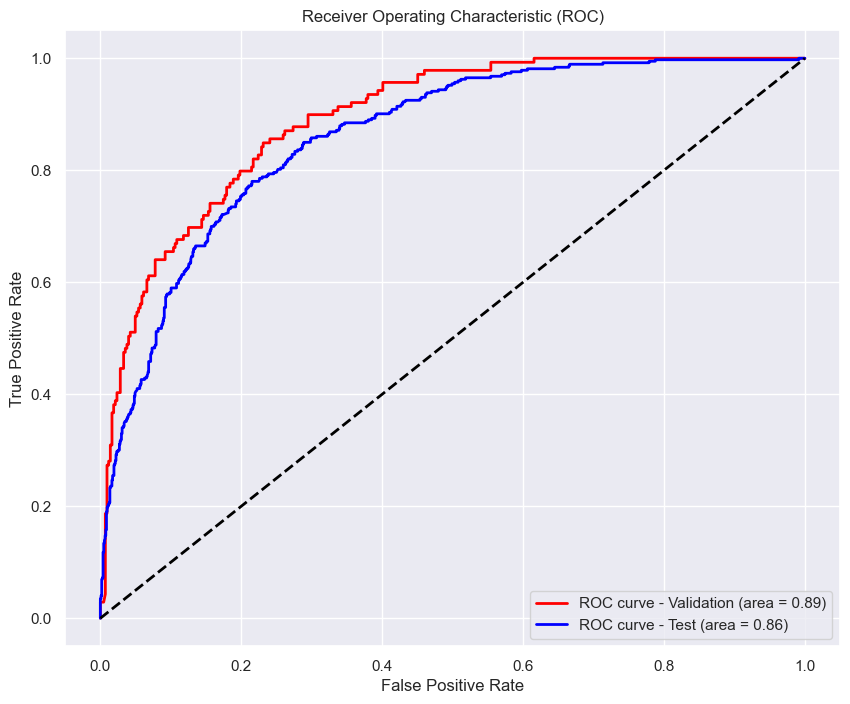

In [158]:
from sklearn.metrics import roc_curve, auc

fpr_best_lgbm_val, tpr_best_lgbm_val, _ = roc_curve(y_val, best_lgbm.predict_proba(X_val)[:, 1])
fpr_best_lgbm_test, tpr_best_lgbm_test, _ = roc_curve(y_test, best_lgbm.predict_proba(X_test)[:, 1])

roc_auc_best_lgbm_val = auc(fpr_best_lgbm_val, tpr_best_lgbm_val)
roc_auc_best_lgbm_test = auc(fpr_best_lgbm_test, tpr_best_lgbm_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_lgbm_val, tpr_best_lgbm_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_best_lgbm_val)
plt.plot(fpr_best_lgbm_test, tpr_best_lgbm_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_best_lgbm_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [161]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='balanced_accuracy', verbose=1)
rfc_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier:", rfc_grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Random Forest Classifier: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [162]:
# best_rfc = rfc_grid_search.best_estimator_

best_rfc = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=50)

best_rfc.fit(X_train_fold, y_train_fold)

y_pred_val = best_rfc.predict(X_val)

accuracy_best_rfc_val = rounded_metric(accuracy_score(y_val, y_pred_val))
f1_best_rfc_val = rounded_metric(f1_score(y_val, y_pred_val, average='weighted'))
roc_auc_best_rfc_val = rounded_metric(roc_auc_score(y_val, y_pred_val))
balanced_accuracy_best_rfc_val = rounded_metric(balanced_accuracy_score(y_val, y_pred_val))

In [163]:
best_rfc.fit(X_train, y_train)
y_pred_test = best_rfc.predict(X_test)

# Calculate average metrics on test data
accuracy_rfc_test_best = accuracy_score(y_test, y_pred_test)
f1_rfc_test_best = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_rfc_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_rfc_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {accuracy_best_rfc_val}\t| Test: {accuracy_rfc_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {f1_best_rfc_val}\t| Test: {f1_rfc_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {roc_auc_best_rfc_val}\t| Test: {roc_auc_rfc_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {balanced_accuracy_best_rfc_val}\t| Test: {balanced_accuracy_rfc_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.822	| Test: 0.8055358410220014
(F1 Score)          --> Avg. Validation: 0.815	| Test: 0.7969864986068546
(ROC-AUC Score)     --> Avg. Validation: 0.725	| Test: 0.7142041984535281
(Balanced Accuracy) --> Avg. Validation: 0.725	| Test: 0.7142041984535282


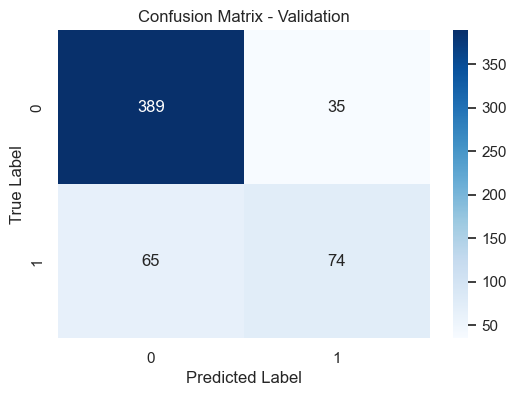

Classification Report - Validation
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       424
           1       0.68      0.53      0.60       139

    accuracy                           0.82       563
   macro avg       0.77      0.72      0.74       563
weighted avg       0.81      0.82      0.81       563



In [164]:
confusion_classification_report(y_val, y_pred_val, 'Validation')

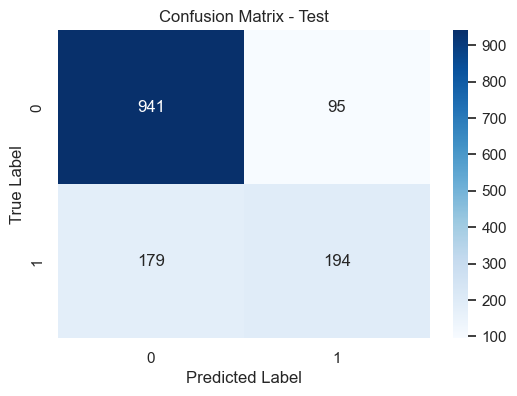

Classification Report - Test
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [165]:
confusion_classification_report(y_test, y_pred_test, 'Test')

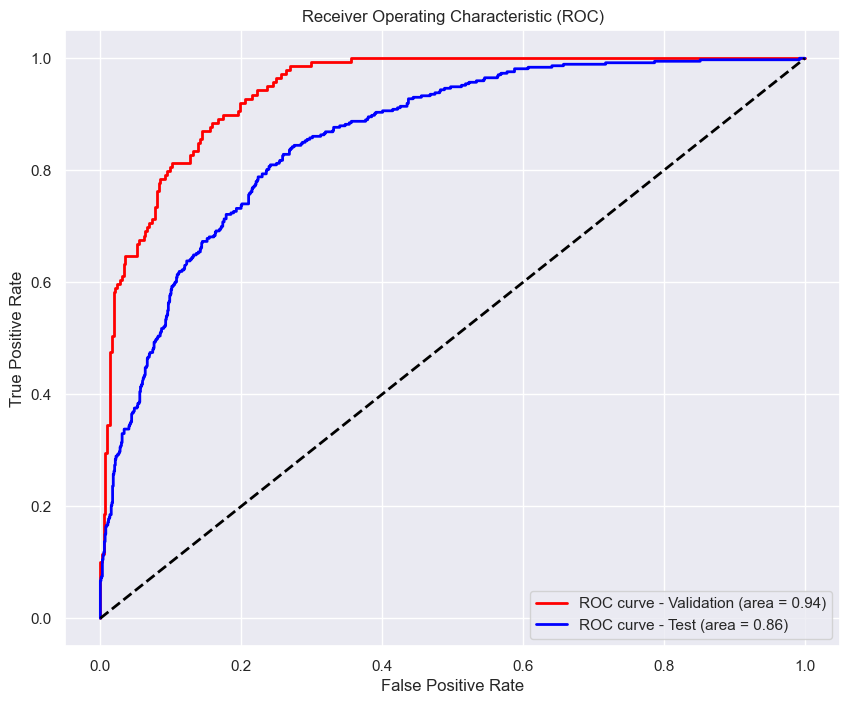

In [166]:
from sklearn.metrics import roc_curve, auc

fpr_best_rfc_val, tpr_best_rfc_val, _ = roc_curve(y_val, best_rfc.predict_proba(X_val)[:, 1])
fpr_best_rfc_test, tpr_best_rfc_test, _ = roc_curve(y_test, best_rfc.predict_proba(X_test)[:, 1])

roc_auc_best_rfc_val = auc(fpr_best_rfc_val, tpr_best_rfc_val)
roc_auc_best_rfc_test = auc(fpr_best_rfc_test, tpr_best_rfc_test)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_rfc_val, tpr_best_rfc_val, color='red', lw=2, label='ROC curve - Validation (area = %0.2f)' % roc_auc_best_rfc_val)
plt.plot(fpr_best_rfc_test, tpr_best_rfc_test, color='blue', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_best_rfc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Evaluation - Hyperparameter Tuning

Without Hyperparameter tuning

In [167]:
df_metric.sort_values(by=['(Val.) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

Model Name  (Val.) Balanced Accuracy  (Test) Balanced Accuracy  \
0  Logistic Regression                     0.749                  0.740000   
1             Catboost                     0.739                  0.724070   
2                  ANN                     0.735                  0.744000   
3            Light GBM                     0.731                  0.714632   
4        Random Forest                     0.701                  0.697000   
5                  KNN                     0.648                  0.670126   

   (Val.) F-1 Score  (Test) F-1 Score  (Val.) ROC-AUC Score  \
0             0.817          0.811000              0.862631   
1             0.821          0.803616              0.900876   
2             0.799          0.803000              0.849209   
3             0.812          0.793234              0.958141   
4             0.799          0.786000              1.000000   
5             0.743          0.751502              0.919718   

   (Test) ROC-AUC Score  (Val.) Accuracy Score  (Test) Accuracy Score  
0              0.860645                  0.819               0.816000  
1              0.856558                  0.826               0.811214  
2              0.848413                  0.798               0.803000  
3              0.851274                  0.817               0.799858  
4              0.832600                  0.808               0.797000  
5              0.741430                  0.746               0.755855

Include Hyperparameter tuning

In [193]:
df_metric_best = pd.DataFrame({
    'Model Name':['Random Forest', 'Logistic Regression', 'KNN', 'Catboost', 'Light GBM', 'ANN'],
    '(Train) Balanced Accuracy':[balanced_accuracy_best_rfc_val, balanced_accuracy_best_lrc_val, balanced_accuracy_best_knn_val, balanced_accuracy_best_cbc_val, balanced_accuracy_best_lgbm_val, balanced_accuracy_best_ann_val],
    '(Test) Balanced Accuracy':[balanced_accuracy_rfc_test_best, balanced_accuracy_lrc_test_best, balanced_accuracy_knn_test_best, balanced_accuracy_cbc_test_best, balanced_accuracy_lgbm_test_best, balanced_accuracy_best_test_ann],
    '(Train) F-1 Score':[f1_best_rfc_val, f1_best_lrc_val, f1_best_knn_val, f1_best_cbc_val, f1_best_lgbm_val, f1_best_ann_val],
    '(Test) F-1 Score':[f1_rfc_test_best, f1_lrc_test_best, f1_knn_test_best, f1_cbc_test_best, f1_lgbm_test_best, f1_best_test_ann],
    '(Train) ROC-AUC Score':[roc_auc_best_rfc_val, roc_auc_best_lrc_val, roc_auc_best_knn_val, roc_auc_best_cbc_val, roc_auc_best_lgbm_val, roc_auc_best_ann_val],
    '(Test) ROC-AUC Score':[roc_auc_rfc_test_best, roc_auc_lrc_test_best, roc_auc_knn_test_best, roc_auc_cbc_test_best, roc_auc_lgbm_test_best, roc_auc_best_test_ann],
    '(Train) Accuracy Score':[accuracy_best_rfc_val, accuracy_best_lrc_val, accuracy_best_knn_val, accuracy_best_cbc_val, accuracy_best_lgbm_val, accuracy_best_ann_val],
    '(Test) Accuracy Score':[accuracy_rfc_test_best, accuracy_lrc_test_best, accuracy_knn_test_best, accuracy_cbc_test_best, accuracy_lgbm_test_best, accuracy_best_test_ann],
})

df_metric_best.sort_values(by=['(Train) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

Model Name  (Train) Balanced Accuracy  (Test) Balanced Accuracy  \
0                  ANN                      0.764                  0.755000   
1  Logistic Regression                      0.753                  0.739834   
2             Catboost                      0.737                  0.728359   
3            Light GBM                      0.735                  0.720531   
4        Random Forest                      0.725                  0.714204   
5                  KNN                      0.722                  0.719403   

   (Train) F-1 Score  (Test) F-1 Score  (Train) ROC-AUC Score  \
0              0.804          0.796000               0.858762   
1              0.817          0.810616               0.863106   
2              0.820          0.804746               0.907832   
3              0.820          0.801670               0.892256   
4              0.815          0.796986               0.943023   
5              0.792          0.787016               0.867797   

   (Test) ROC-AUC Score  (Train) Accuracy Score  (Test) Accuracy Score  
0              0.755000                   0.798               0.792000  
1              0.739834                   0.817               0.815472  
2              0.728359                   0.826               0.811214  
3              0.720531                   0.826               0.809794  
4              0.714204                   0.822               0.805536  
5              0.719403                   0.792               0.789212

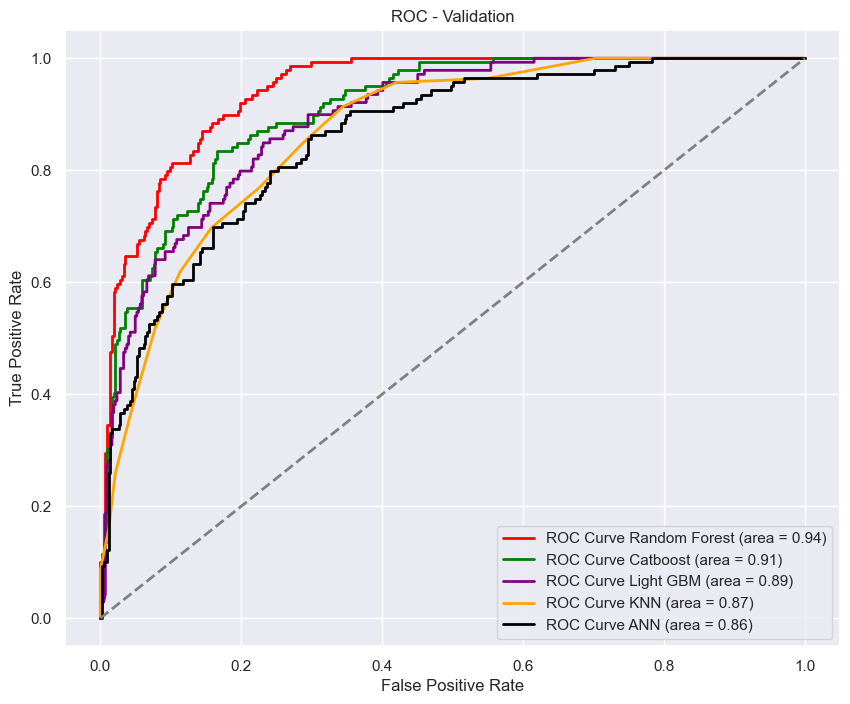

In [169]:
# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_rfc_val, tpr_best_rfc_val, color='red', lw=2, label='ROC Curve Random Forest (area = %0.2f)' % roc_auc_best_rfc_val)
plt.plot(fpr_best_cbc_val, tpr_best_cbc_val, color='green', lw=2, label='ROC Curve Catboost (area = %0.2f)' % roc_auc_best_cbc_val)
plt.plot(fpr_best_lgbm_val, tpr_best_lgbm_val, color='purple', lw=2, label='ROC Curve Light GBM (area = %0.2f)' % roc_auc_best_lgbm_val)
plt.plot(fpr_best_knn_val, tpr_best_knn_val, color='orange', lw=2, label='ROC Curve KNN (area = %0.2f)' % roc_auc_best_knn_val)
plt.plot(fpr_best_ann_val, tpr_best_ann_val, color='black', lw=2, label='ROC Curve ANN (area = %0.2f)' % roc_auc_best_ann_val)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Validation')
plt.legend(loc="lower right")
plt.show()

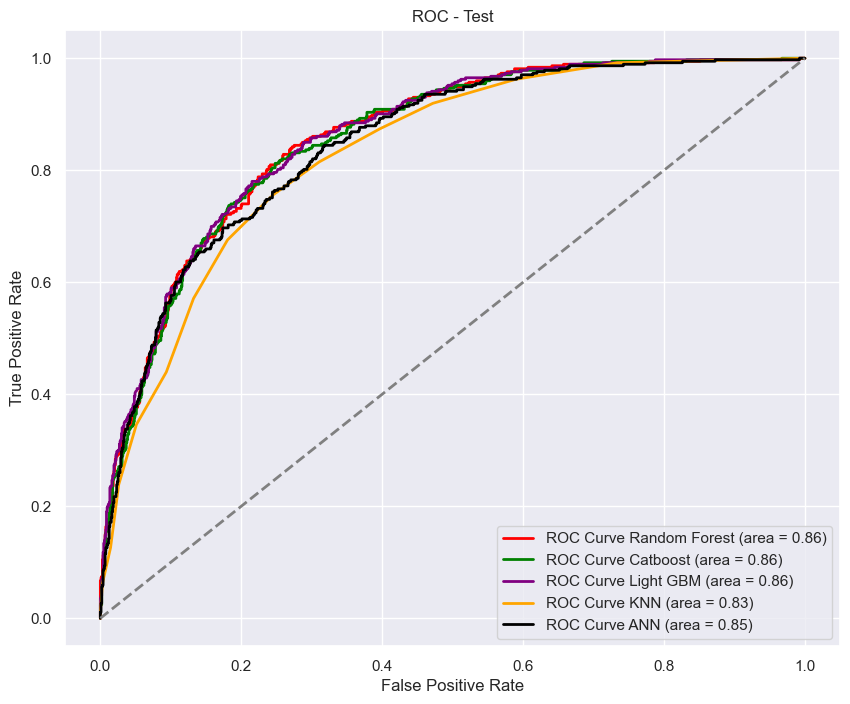

In [170]:
# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_rfc_test, tpr_best_rfc_test, color='red', lw=2, label='ROC Curve Random Forest (area = %0.2f)' % roc_auc_best_rfc_test)
plt.plot(fpr_best_cbc_test, tpr_best_cbc_test, color='green', lw=2, label='ROC Curve Catboost (area = %0.2f)' % roc_auc_best_cbc_test)
plt.plot(fpr_best_lgbm_test, tpr_best_lgbm_test, color='purple', lw=2, label='ROC Curve Light GBM (area = %0.2f)' % roc_auc_best_lgbm_test)
plt.plot(fpr_best_knn_test, tpr_best_knn_test, color='orange', lw=2, label='ROC Curve KNN (area = %0.2f)' % roc_auc_best_knn_test)
plt.plot(fpr_best_ann_test, tpr_best_ann_test, color='black', lw=2, label='ROC Curve ANN (area = %0.2f)' % roc_auc_best_ann_test)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test')
plt.legend(loc="lower right")
plt.show()

## Interpretable Machine Learning Model 

In [171]:
from sklearn import metrics, ensemble, tree, inspection, model_selection
import shap
from pdpbox import pdp, info_plots

### SHAP Bar Plot (120)

In [175]:
cb_explainer = shap.Explainer(best_cbc)
cb_shap = cb_explainer(X_test)

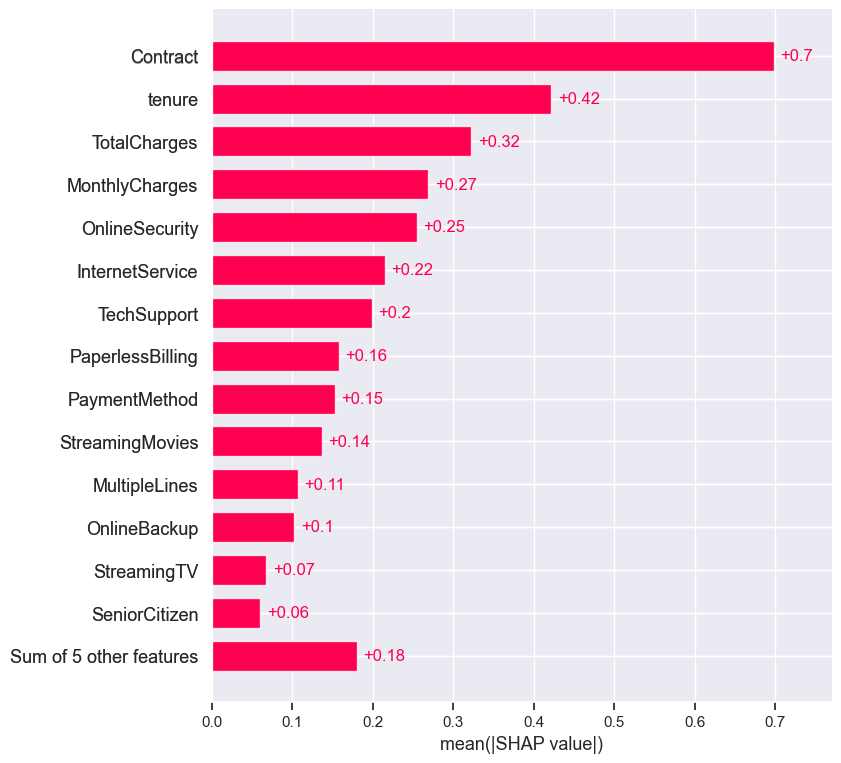

In [176]:
shap.plots.bar(cb_shap, max_display=15)

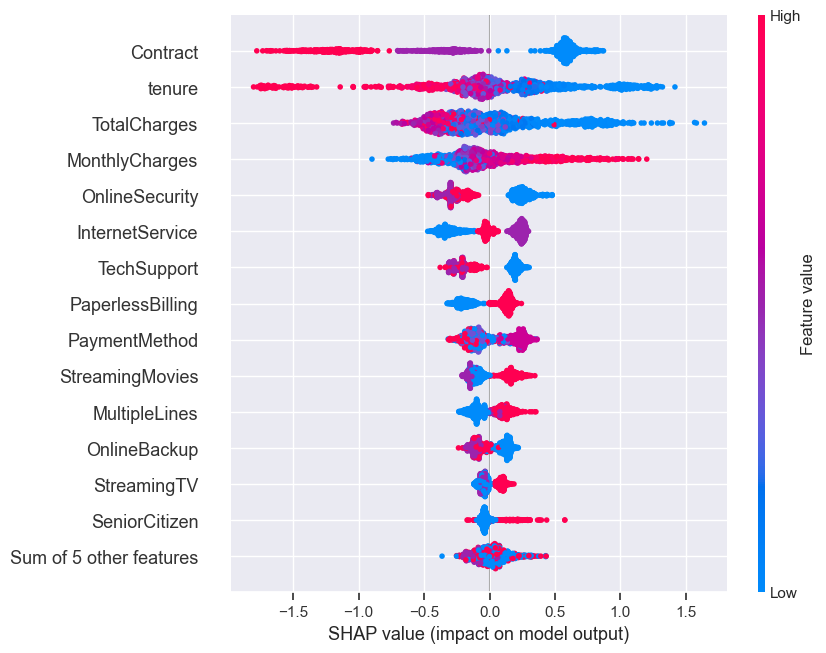

In [177]:
shap.plots.beeswarm(cb_shap, max_display=15)

### Feature Importance

<Axes: ylabel='Feature'>

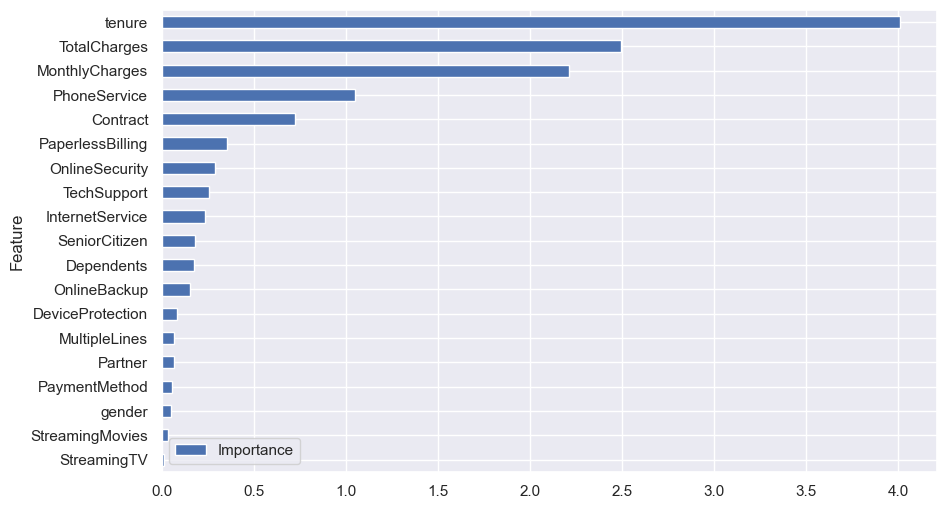

In [178]:
coefficients = best_lrc.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

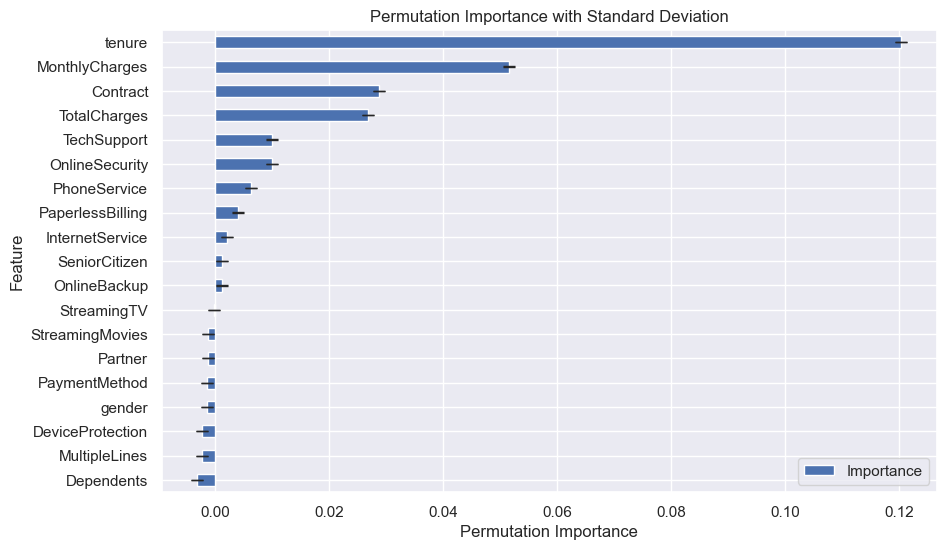

In [179]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_lrc, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

In [180]:
cb_feat_imp = best_cbc.feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'cb_feat_imp': cb_feat_imp,
}).sort_values('cb_feat_imp', ascending=False)

feat_imp_df.style.format(
    '{:.2f}%', subset=['cb_feat_imp']).\
    bar(subset=['cb_feat_imp'], color='#4EF', width=60
)

### PDP (Partial Dependence Plot)

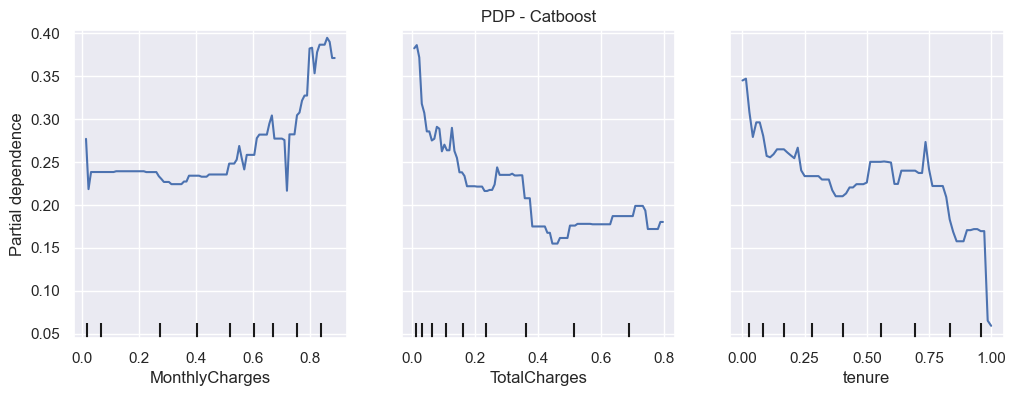

In [181]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("PDP - Catboost")

# Features untuk PDP
features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Plot PDP
PartialDependenceDisplay.from_estimator(best_cbc, X, features, ax=ax)

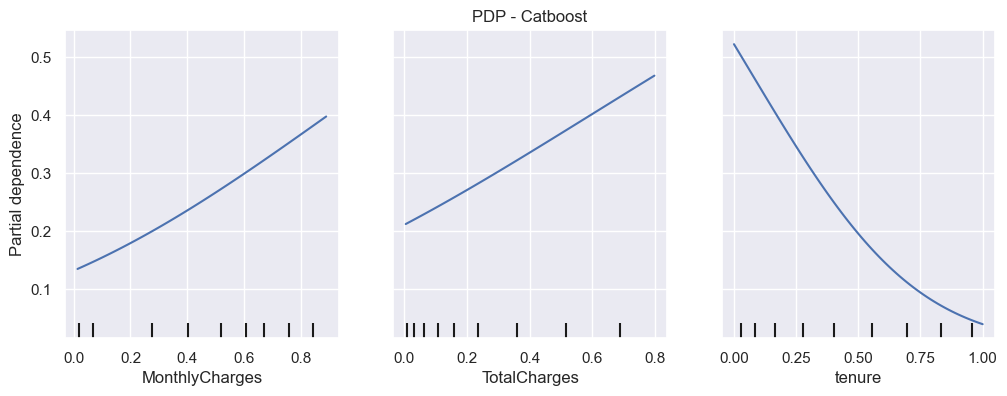

In [182]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("PDP - Catboost")

# Features untuk PDP
features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Plot PDP
PartialDependenceDisplay.from_estimator(best_lrc, X, features, ax=ax)

### Permutation Feature Importance

In [187]:
cb_perm_imp = inspection.permutation_importance(
    best_cbc, X_test, y_test, n_repeats=10, scoring='accuracy'
)

rf_perm_imp = inspection.permutation_importance(
    best_rfc, X_test.to_numpy(), y_test.to_numpy(), n_repeats=10, scoring='accuracy'
)

In [188]:
perm_imp_df = pd.DataFrame(
{
    'feature':X_train.columns,
    'cb_perm_mean':cb_perm_imp.importances_mean,
    'cb_perm_std':cb_perm_imp.importances_std,
    'rf_perm_mean':rf_perm_imp.importances_mean,
    'rf_perm_std':rf_perm_imp.importances_std
}

)
perm_imp_df = perm_imp_df.sort_values(
    'cb_perm_mean', ascending=False
)
perm_imp_df.style.format(
    '{:.4f}', subset=['cb_perm_mean', 'cb_perm_std', 'rf_perm_mean',
    'rf_perm_std']).bar(subset=['cb_perm_mean', 'rf_perm_mean'],\
    color='#4EF', width=60
)